# **Coursework Objectives**

Structure
- EDA
- Pre-process, showing reasoning
- Multiple initial models with fine tunining
- Understanding of metrics (model performance)
- Comparing final models

## Your Name: George Williamson-Snape
## Project 1 attempted was: (1) Tabular
## Project 2 attempted was: (4) Time-series

In [ ]:
import numpy as np
np.random.seed(2001)

CSC8635 Coursework Specification

For this coursework you will attempt **TWO** of the four longer project-style questions. All of the project-style questions can be found in this notebook. You should provide all of your answers in this notebook and submit it to Canvas before the submission deadline.

---
---
---
##Mini-projects: Introduction

This document defines four project-style questions which go more deeply into one of the areas from the module. You should pick **TWO** of these project-stye questions to answer.

The learning objectives of this assignment are:
1. To learn about the design of machine learning analysis pipelines
2. To understand how to select appropriate methods given the dataset type
3. To learn how to conduct machine learning experimentation in a rigorous and effective manner
4. To critically evaluate the performance of the designed machine learning pipelines
5. To learn and practice the skills of reporting machine learning experiments

For this coursework you will be provided with a choice of four different datasets of different nature
1. A tabular dataset (defined as a classification problem)
2. An image dataset
3. A text dataset
4. A time series dataset

Your job is easy to state: You should pick **TWO** out of these four options and design a range of machine learning pipelines appropriate to the nature of each of the selected datasets. Overall, we expect that you will perform a thorough investigation involving (whenever relevant) all parts of a machine learning pipeline (exploration, preprocessing, model training, model interpretation and evaluation), evaluating a range of options for all parts of the pipeline and with proper hyperparameter tuning.

You will have to write a short report (as part of this notebook) that presents the experiments you did, their justification, a detailed description of the performance of your designed pipelines using the most appropriate presentation tools (e.g., tables of results, plots). We expect that you should be able to present your work at a level of detail that would enable a fellow student to reproduce your steps.

## Deliverables
An inline report and code blocks addressing the marking scheme below. The report should have 1000 to 2000 words. The word count excludes references, tables, figures and section headers, and has a 10% leeway.

## Marking scheme

- Writing Style, references, figures, etc. 7 marks
- Dataset exploration 7 marks
- Methods 21 marks
- Results of analysis 21 marks
- Discussion 14 marks

# **Injury Severity Classification**

---
---
## Project 1: Tabular dataset (70 marks)

The dataset, called FARS, is a collection of statistics of US road traffic accidents. The class label is about the severity of the accident. It has 20 features and over 100K examples. The dataset is available in Canvas as a CSV file, in which the last column contains the class labels: https://ncl.instructure.com/courses/53509/files/7652449/download?download_frd=1

Experiments on the tabular dataset will be relatively fast compared to the other three options. To compensate, we expect that you evaluate a very broad range of options for the design of your machine learning pipelines, including (but not limited to) data normalisation, feature/instance selection, class imbalance correction, several (appropriate) machine learning models, hyperparameter tuning and cross-validation evaluation.

# **Injury Severity Classification - Solution**

In this project, we will explore a data set based on statistics of US traffic accidents. We will look to classify levels of injuries through the use of various machine learning methods ranging from your traditional tree-based methods and others like K-nearest Neighbours (KNN) and Support Vector Machines (SVM), along with some deep learning Recurrent Neural Networks (RNN) too. The data set consists of various features ranging from the position in a car, person type and the state where the accident occured.

# Exploratory Data Analysis (EDA)

Loading in the data and any relevenat packages for the EDA stage of the report.

In [ ]:
# EDA packages
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# access google drive folder
drive.mount("/content/drive")

# set seed
np.random.seed(2001)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load data
raw_df = pd.read_csv("/content/drive/MyDrive/data/Tabular/fars.csv", delimiter = ",") # csv
df = raw_df

Will look to get a good idea of the shape and contents of the dateframe and the types of data inside it.

In [ ]:
# sample of data
df.head()

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,INJURY_SEVERITY
0,Alabama,34,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Air_Bag_Available_but_Not_Deployed_for_this_Seat,Totally_Ejected,Unknown,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,White,Fatal_Injury
1,Alabama,20,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Deployed_Air_Bag_from_Front,Totally_Ejected,Unknown,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,White,Fatal_Injury
2,Alabama,43,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Black,Fatal_Injury
3,Alabama,38,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Front_Seat_-_Right_Side,Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),Incapaciting_Injury
4,Alabama,50,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Deployed_Air_Bag_from_Front,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Black,Fatal_Injury


In [ ]:
# print data structures
print("\nData Shape:")
print(df.shape)

print("\nData Types:")
print(df.dtypes)


Data Shape:
(100968, 30)

Data Types:
CASE_STATE                             object
AGE                                     int64
SEX                                    object
PERSON_TYPE                            object
SEATING_POSITION                       object
RESTRAINT_SYSTEM-USE                   object
AIR_BAG_AVAILABILITY/DEPLOYMENT        object
EJECTION                               object
EJECTION_PATH                          object
EXTRICATION                            object
NON_MOTORIST_LOCATION                  object
POLICE_REPORTED_ALCOHOL_INVOLVEMENT    object
METHOD_ALCOHOL_DETERMINATION           object
ALCOHOL_TEST_TYPE                      object
ALCOHOL_TEST_RESULT                     int64
POLICE-REPORTED_DRUG_INVOLVEMENT       object
METHOD_OF_DRUG_DETERMINATION           object
DRUG_TEST_TYPE_(1_of_3)                object
DRUG_TEST_RESULTS_(1_of_3)              int64
DRUG_TEST_TYPE_(2_of_3)                object
DRUG_TEST_RESULTS_(2_of_3)              i

It seems that there are 30 features within the given dataset and about 100,000 observations too. Most of the features appear to be categorical variables but there are a few conintuous ones too.

Now, a look at a bar chart or histogram of each variable to see what we are dealing with.

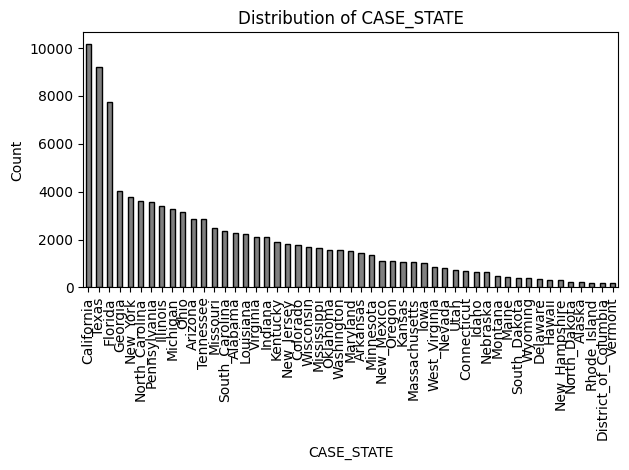

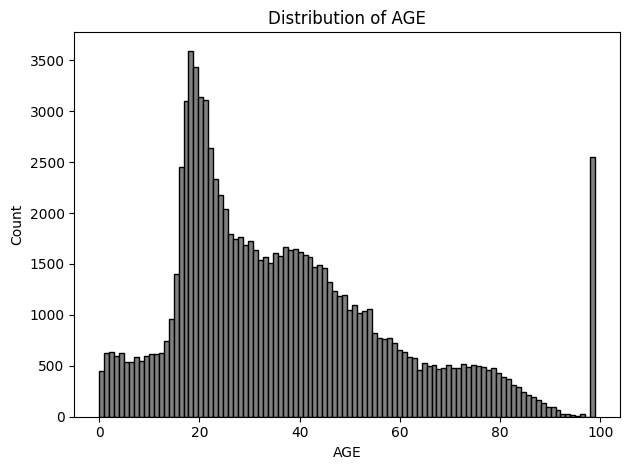

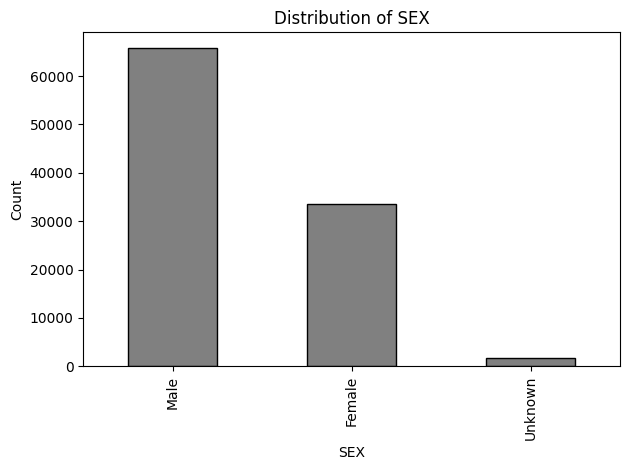

<ipython-input-5-35a052a0023e>:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


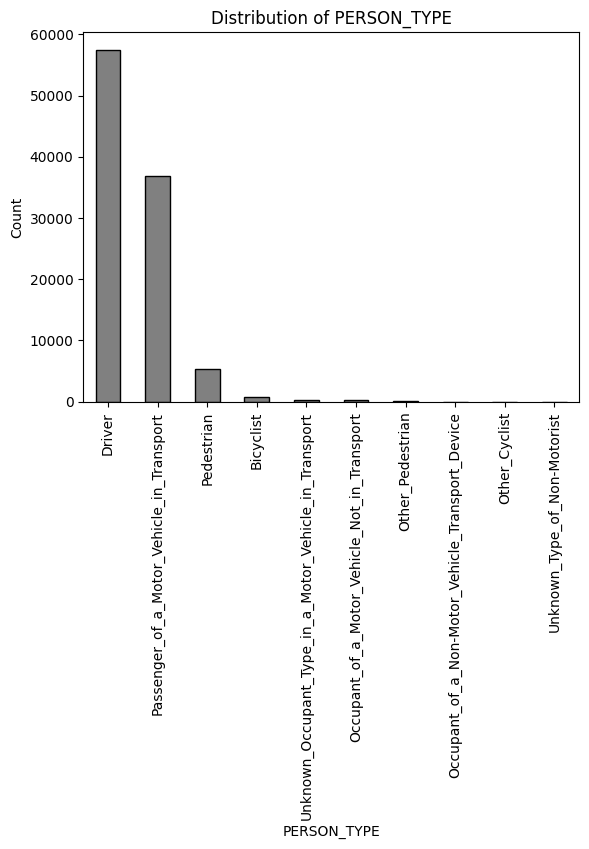

<ipython-input-5-35a052a0023e>:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


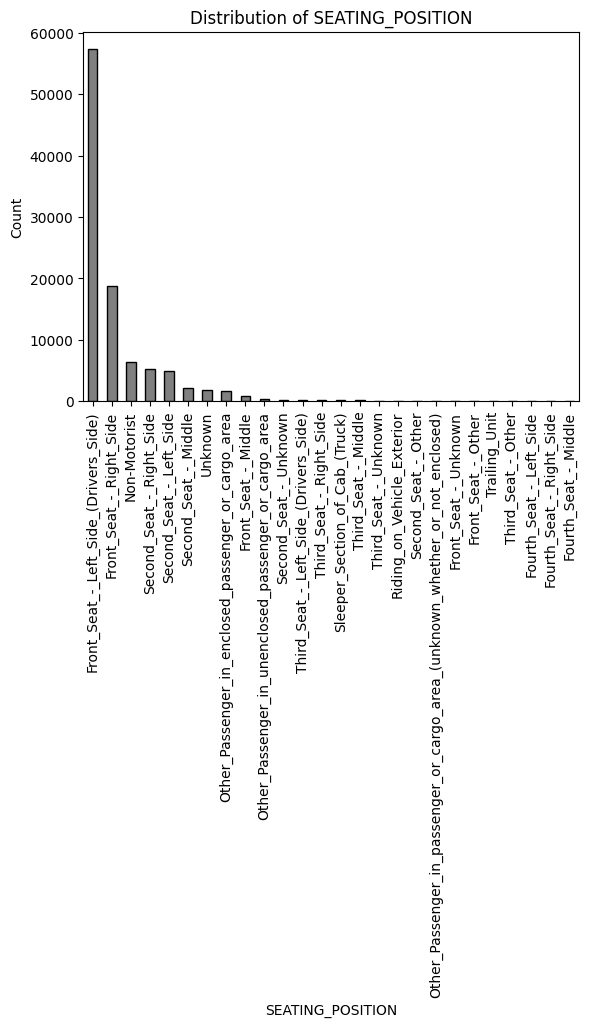

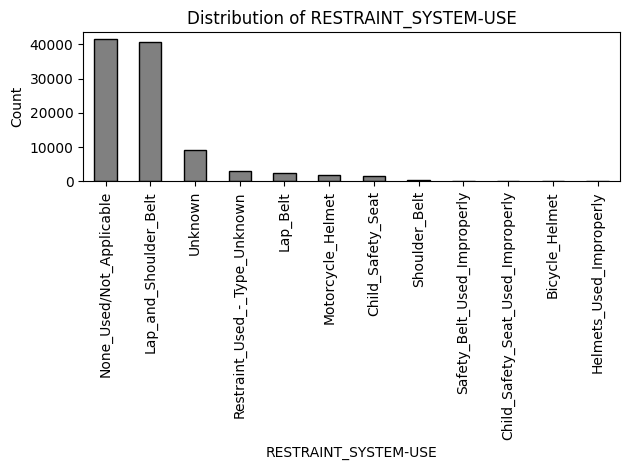

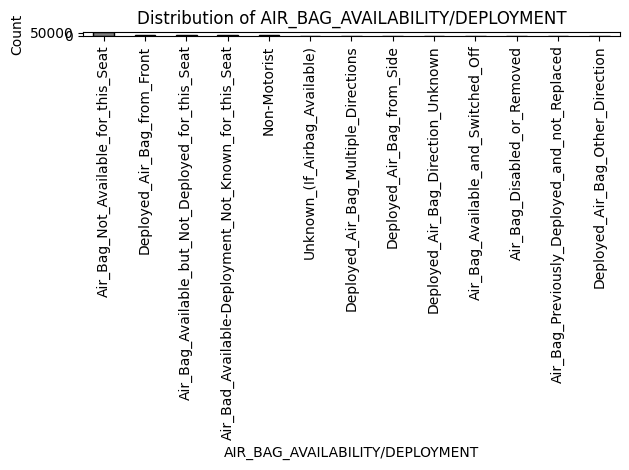

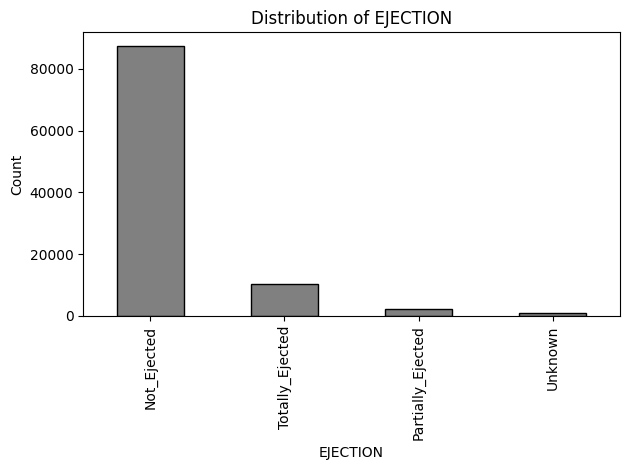

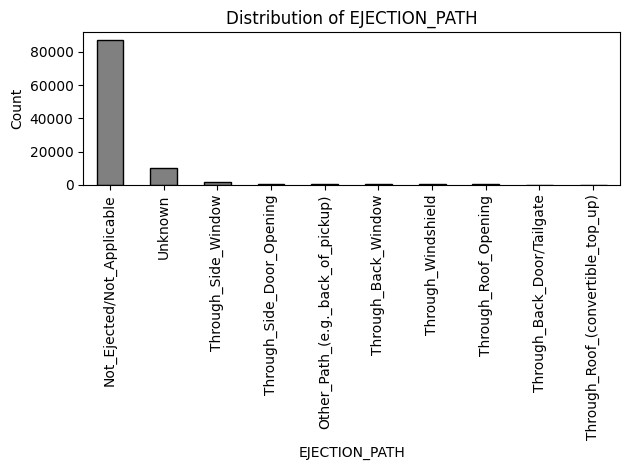

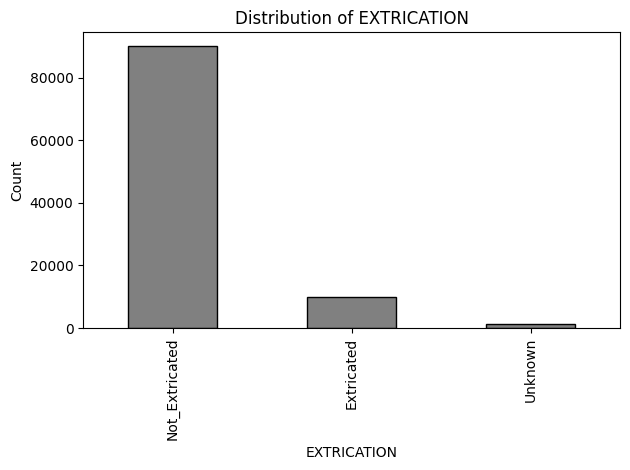

<ipython-input-5-35a052a0023e>:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


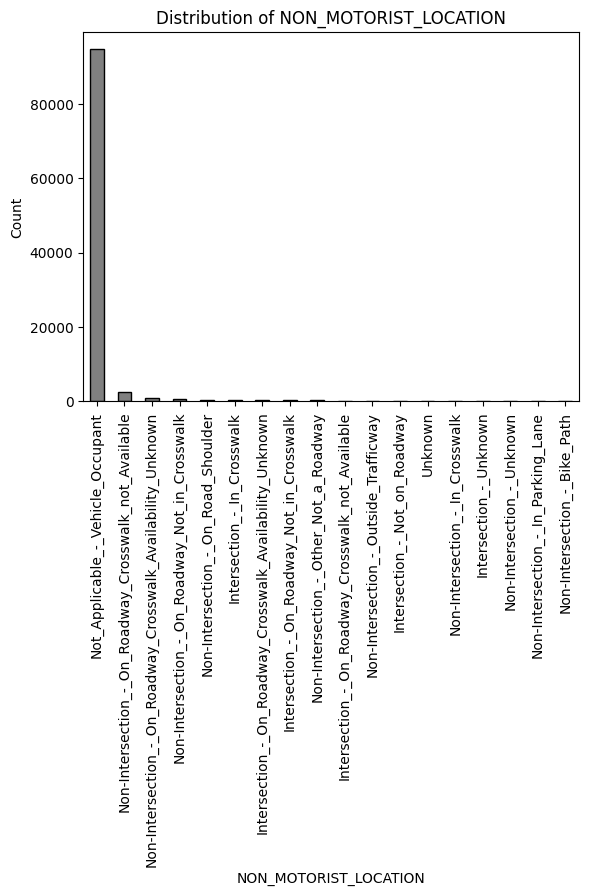

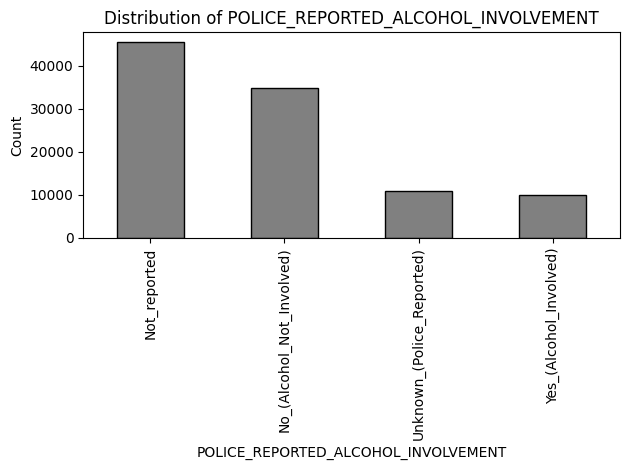

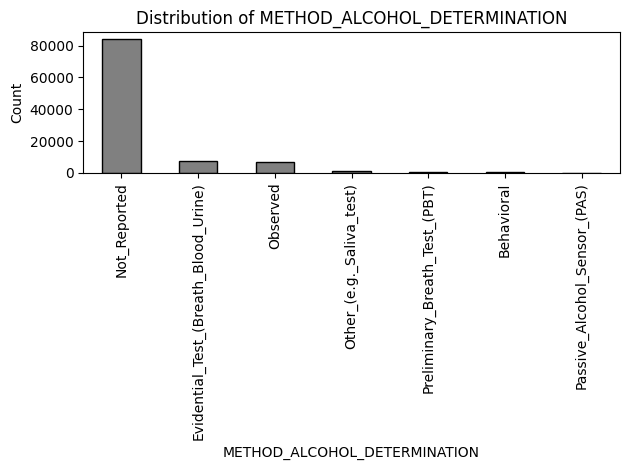

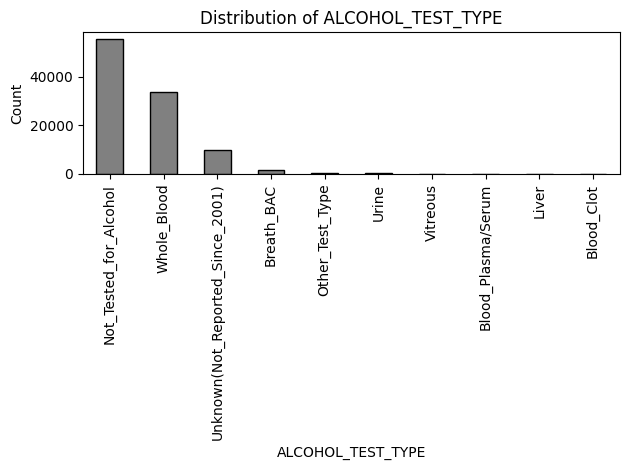

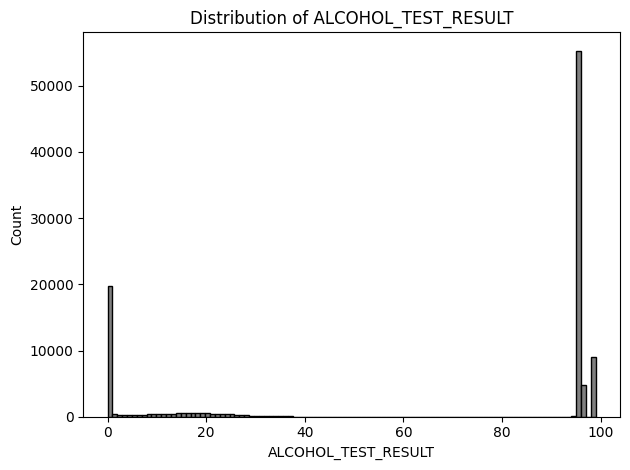

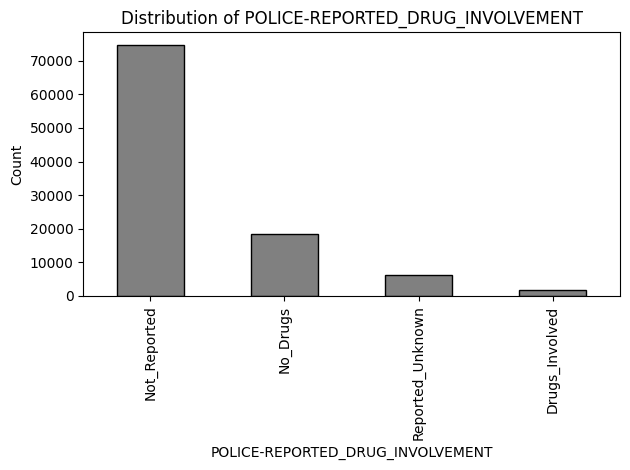

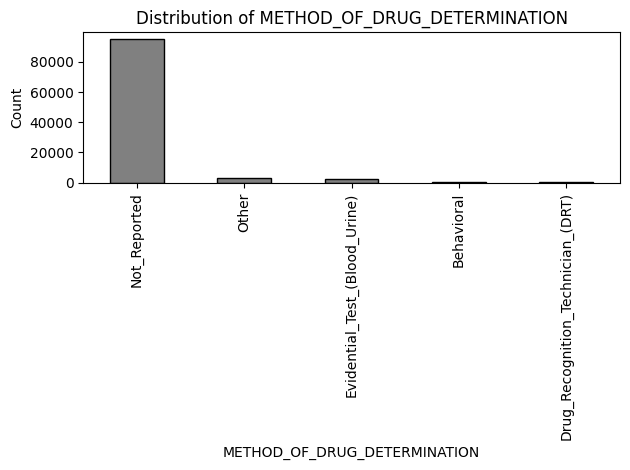

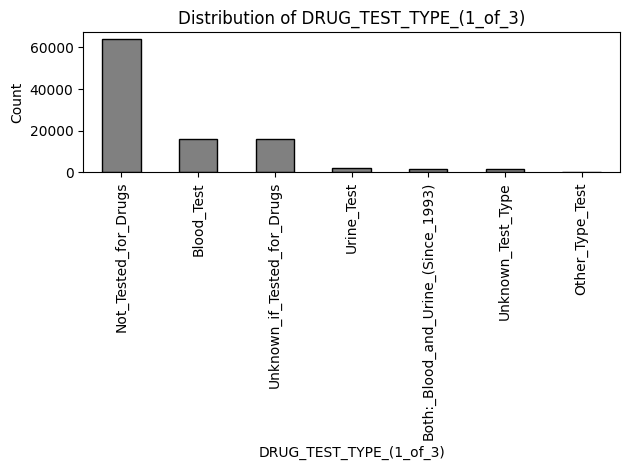

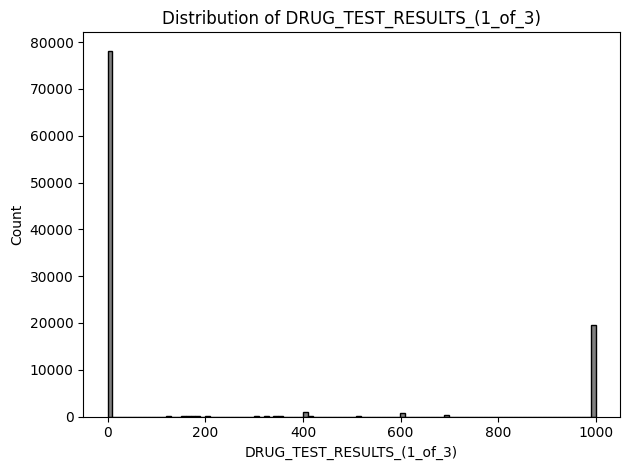

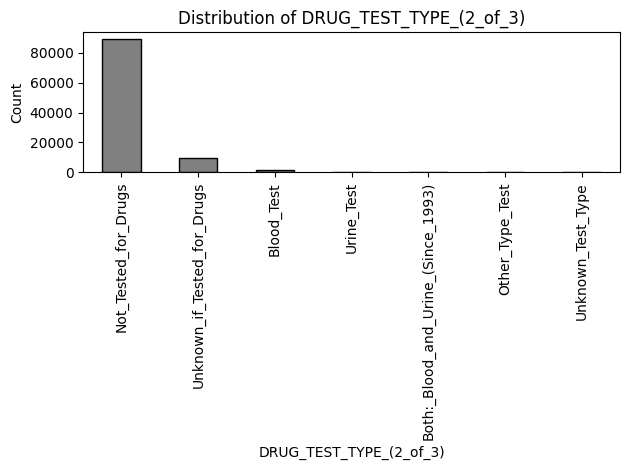

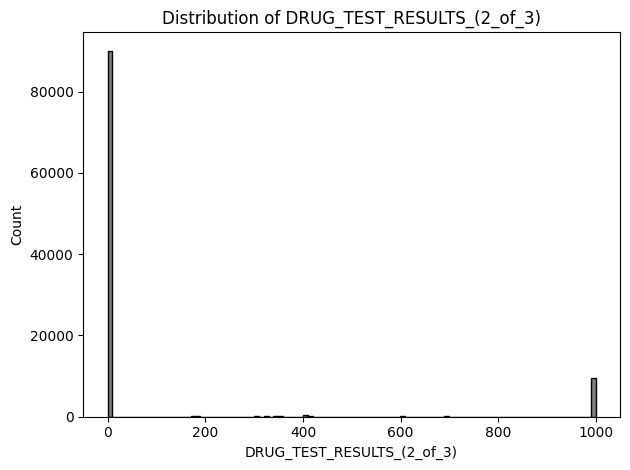

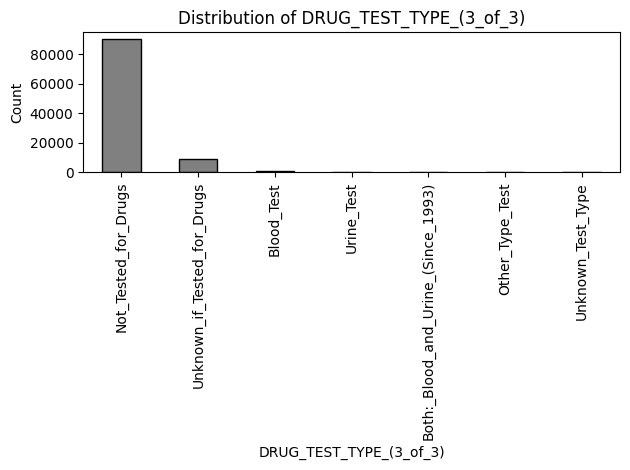

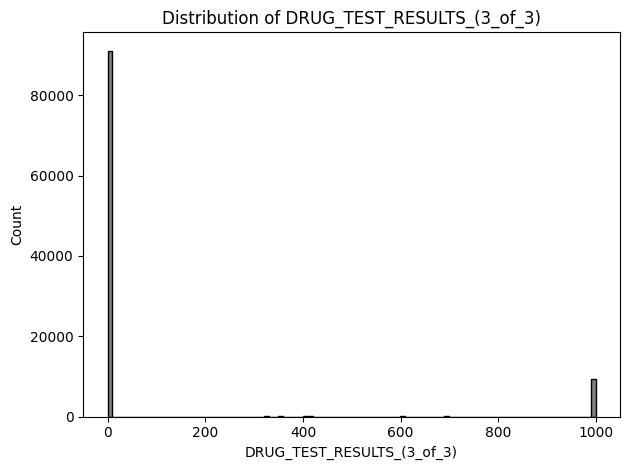

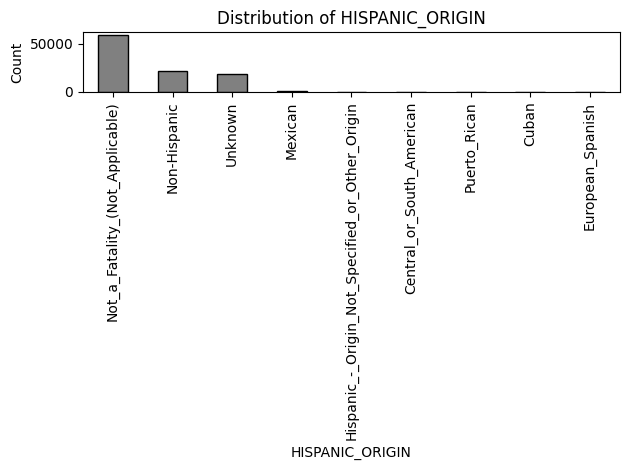

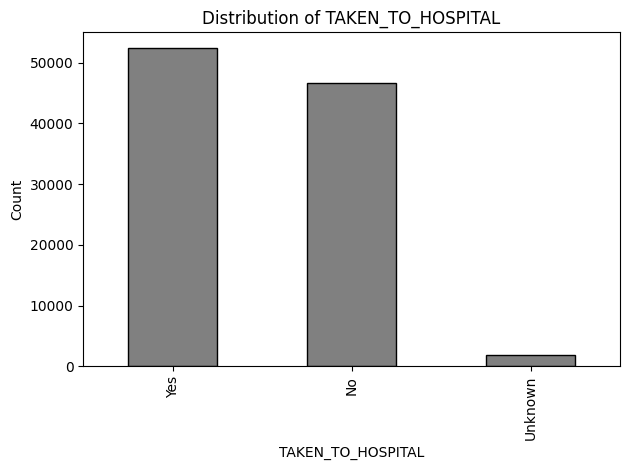

<ipython-input-5-35a052a0023e>:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


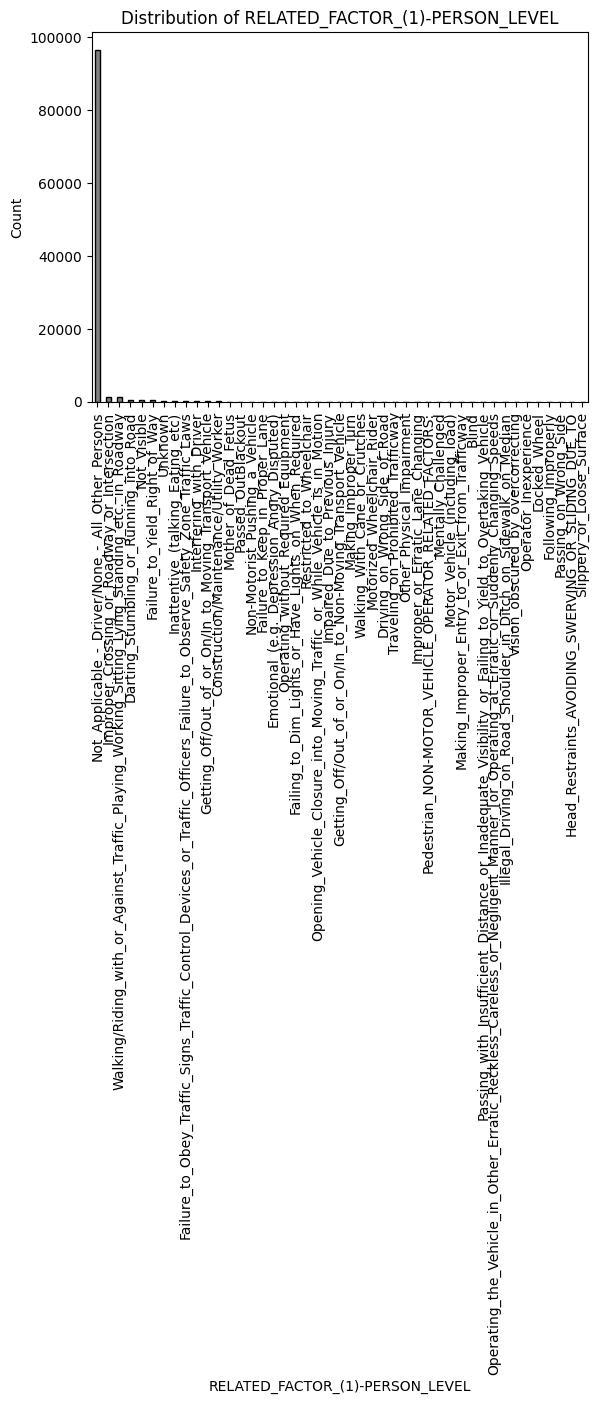

<ipython-input-5-35a052a0023e>:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


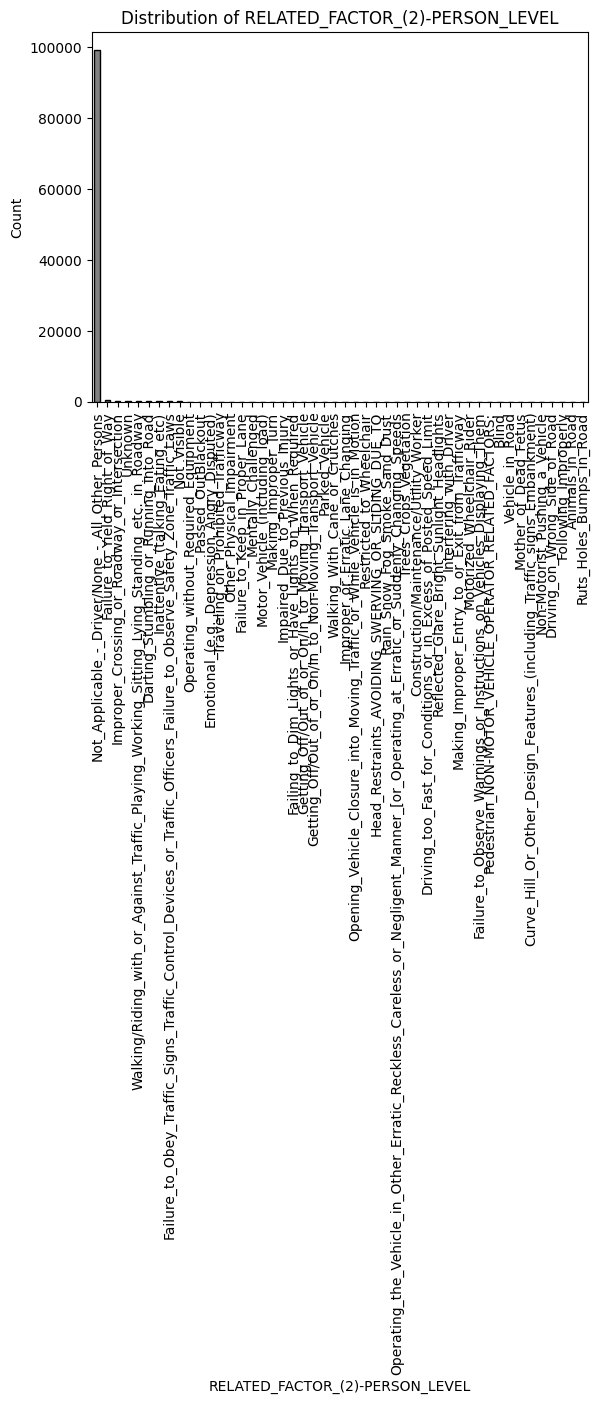

<ipython-input-5-35a052a0023e>:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


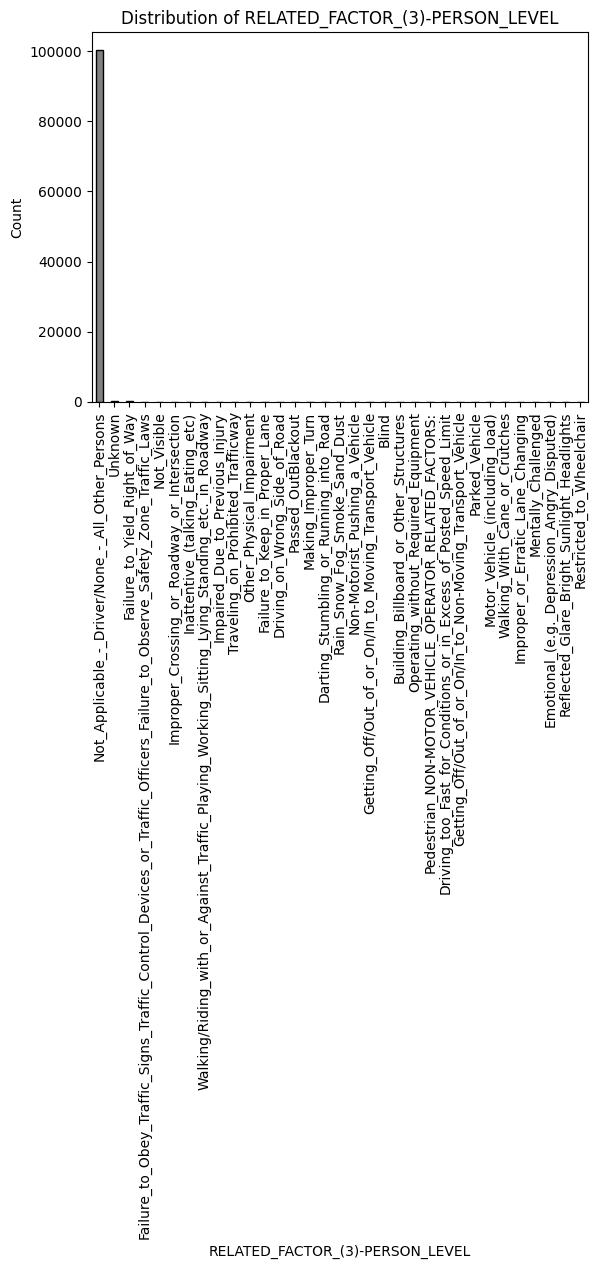

<ipython-input-5-35a052a0023e>:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


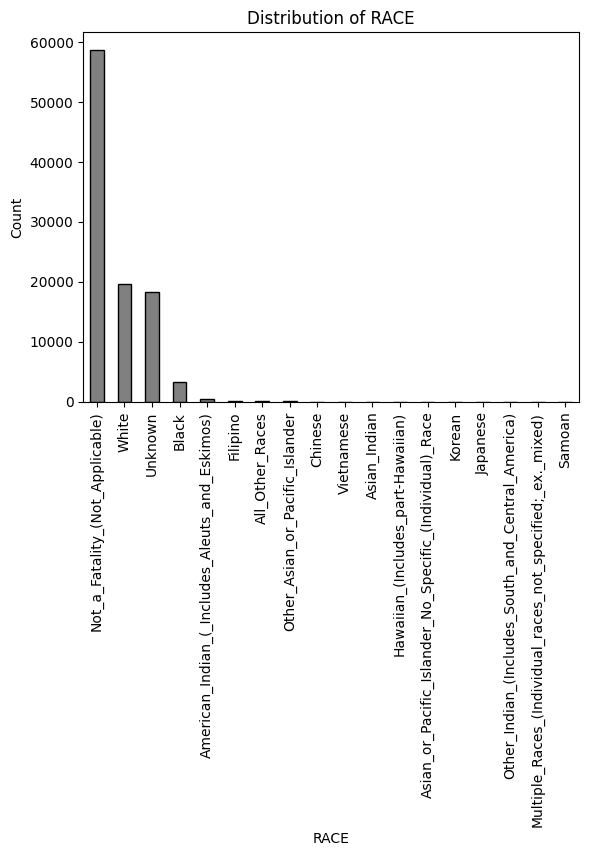

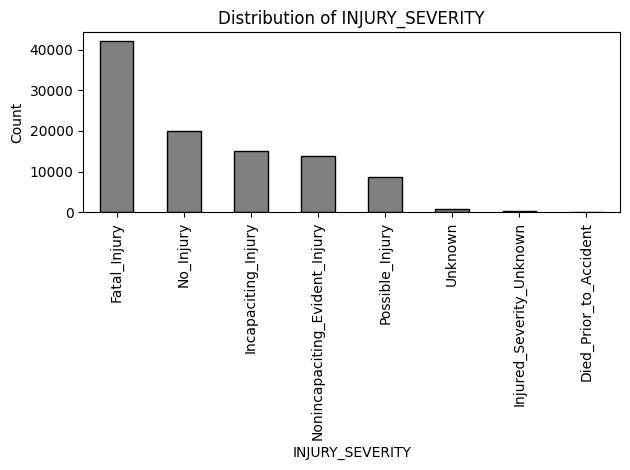

In [ ]:
# plot each feature
for column in df.columns:
  plt.figure()  # new figure for each feature
  if df[column].dtype == "object":
    df[column].value_counts().plot(kind = "bar", color = "gray", edgecolor = "black") # bar chart for categorical
  else:
    plt.hist(df[column], bins = 100, color = "gray", edgecolor = "black") # histogram for numeric

  # labels
  plt.title("Distribution of {}".format(column))
  plt.xlabel(column)
  plt.ylabel("Count")
  plt.tight_layout()
  plt.show()

Scanning the plots, it appears that there is an issue with the AGE varaible, it seems unlikely that so many people aged 99 were involved in an accident according to the actual data and also intuition, so probably an outlier. It also appears like the majority of the features are categorical, where CASE_STATE will cause a particular problem, this will pose a problem later since machine learning models generally cannot deal with this type of data and prefer continuous numerical or binary data.

A way to tackle this categorical problem would be to just one hot encode everything but this would result in approximately 350 varaibles which is computationally expensive when it comes to fitting the data. This could be reduced by removing variables that are either sparse, highly correlated with other varaibles or to combine like varaibles where the specifics may be less import (for example, the position of a person in the back seat may be irrelavant and the fact they were in the back is the only important factor) or simply converting to ordered data where appropriate . It is important to avoid multicolinearity since some models such as KNN and support vector machines (SVM) are sensitive to them, it specifically causes K-Nearest Nieghbours (KNN) models to distort the actual distances it uses to calculate and fit a model.

The plots also highlight the number of missing or unknown values within the data. This can be dealt with using a number of methods where the easiest option would be to just completely remove them. Other, better, methods include reassigning them the median or mean values of the relevant feature or better yet using a machine learning model such as K-Nearest Nieghbours or RandomForest to replace them.


Taking a look at a few metrics on the categorical data.

In [ ]:
# data statistics
df.describe()

,AGE,ALCOHOL_TEST_RESULT,DRUG_TEST_RESULTS_(1_of_3),DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_RESULTS_(3_of_3)
count,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000
mean,37.106707,68.023116,207.393758,100.089672,95.441556
std,22.109641,42.306371,396.194002,295.089512,292.121277
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,15.000000,0.000000,0.000000,0.000000
50%,32.000000,96.000000,0.000000,0.000000,0.000000
75%,49.000000,96.000000,1.000000,0.000000,0.000000
max,99.000000,99.000000,999.000000,999.000000,999.000000


It seems that the DRUG_TEST_RESULTS are generally either 0 or 999 which can be seen better in the plot however, the first one seems to have more 999 values than the rest and more variance.

It also seems that most people to are in a traffic accident are aged 32, according to the data, and that the mean of 37 suggests that people aged higher than 32 are involved in more accidents compared to those aged 32 and lower, it does not seem like this is a normal distribution but perhaps Gamma or some other distribution from the exponetial family like Beta.

Most people achieve a high ALCOHOL_TEST_RESULT suggesting that the officers, or people to provide the alcohol test, make a good judgement on when to do so which is useful in out assumption that if they were intoxicated they were tested.

# Pre-processing

Loading in more relevant packages for this stage.

In [ ]:
# pre-processing packages
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
#from ydata_profiling import ProfileReport # doesnt work
from sklearn.impute import KNNImputer
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In this part of the report we will focus on cleaning and generally readying the data for modelling. This includes dealing with the data quality, for example, if there are any irrelvant, noisy or missing values. It is important to cover these sinse they can actually prevent some models from even running and if they do run, they can be unreliable due to it being fitted on data that does not necessarily represent the true nature topic. Scaling may also be necessary, especialy for any neural network based algorithm, however, models like RandomForest generally do not require the data to be scaled. This report does not actually integrate any new data into the process but it is certainly an option and no harmonisation was necessary.

Before any pre-processing can be done it is appropriate to first consider the issues within the data, namely AGE. It seems that the way the data has been recorded is that if the age of the victim was unknown it was simply recorded as 99, there is potentially other reasoning but this seems most likely. Following the values (96, 97, 98) leading up to 99 suggests it should realistically be no higher than 50 at most. Setting this to unknown for now and removing anyone who may have been in an accident and were 99 should not massively effect the underlying structure as the data contains 100,000 people.

In [ ]:
# replace faults with nan
df["AGE"].replace(99, np.nan, inplace = True)
((df["AGE"] == 99) == True).sum() # check
raw_df.shape[0] - df.shape[0]

0

Just a quick look at duplicates before viewing the unknowns, dropping and printing any occurrences. This shows that there is a considerable amount of the same data and hence, to reduce the noise, this data will be removed.

Dealing with the missing values, currently they are in a difficult format and converting them to np.nan values will be ideal.

In [ ]:
# convert unknowns to nan
df = df.applymap(lambda x: np.nan if "Unknown" in str(x) else x)
df = df.applymap(lambda x: np.nan if "Not_Reported" in str(x) else x)
df = df.applymap(lambda x: np.nan if "Not_reported" in str(x) else x)
df = df.applymap(lambda x: np.nan if "Not_a_Fatality_(Not_Applicable)" in str(x) else x)

Now looking at the amount of missing data in each column.

In [ ]:
# number of unknowns in data
df.isna().sum()

CASE_STATE                                 0
AGE                                     1201
SEX                                      468
PERSON_TYPE                              198
SEATING_POSITION                        1652
RESTRAINT_SYSTEM-USE                   10569
AIR_BAG_AVAILABILITY/DEPLOYMENT         2469
EJECTION                                 626
EJECTION_PATH                           9611
EXTRICATION                              960
NON_MOTORIST_LOCATION                   1265
POLICE_REPORTED_ALCOHOL_INVOLVEMENT    51309
METHOD_ALCOHOL_DETERMINATION           76640
ALCOHOL_TEST_TYPE                       9014
ALCOHOL_TEST_RESULT                        0
POLICE-REPORTED_DRUG_INVOLVEMENT       74134
METHOD_OF_DRUG_DETERMINATION           86941
DRUG_TEST_TYPE_(1_of_3)                15992
DRUG_TEST_RESULTS_(1_of_3)                 0
DRUG_TEST_TYPE_(2_of_3)                 8462
DRUG_TEST_RESULTS_(2_of_3)                 0
DRUG_TEST_TYPE_(3_of_3)                 8446
DRUG_TEST_

It seems that there is a lot of missing data and the report will attempt at either imputing them or removing them completely. It is often wanted to avoid simply removing missing values however, if a column contains over 20% of unknown data it is wrong to estimate their true values as it may distort the actual underlying pattern. On that note, this next line of code removes the mentioned variables.

In [ ]:
# features with +20% missing data
threshold_20 = 0.2 * df.shape[0]
missing_vals = df.isna().sum()
empty_features = missing_vals[missing_vals > threshold_20]
empty_features = empty_features.index.tolist()
df = df.drop(columns = empty_features)

# print features removed
empty_features

['POLICE_REPORTED_ALCOHOL_INVOLVEMENT',
 'METHOD_ALCOHOL_DETERMINATION',
 'POLICE-REPORTED_DRUG_INVOLVEMENT',
 'METHOD_OF_DRUG_DETERMINATION',
 'HISPANIC_ORIGIN',
 'RACE']

We will come back to the missing values but now the report will look at ordering any variables that can be ordinal/binary data rather than one hot encoded data, this will make interpretability easier in the binary and ordinal case but converting to ordinal has the additional benefit in that there will be less features. Dropping the observations containing "died prior to accident" is also a good idea since it does not really answer the question directly. They would have died then crashed meaning there is no injury to predict.

In [ ]:
# case states to ordinal (to their accident frequency)
accident_rate = df["CASE_STATE"].value_counts()
df["CASE_STATE"] = df["CASE_STATE"].map(accident_rate)
df.rename(columns = {"CASE_STATE": "CASE_STATE_RATE"}, inplace = True)

# ejection to ordinal
ejection_mapping = {
    "Totally_Ejected": 2,
    "Partially_Ejected": 1,
    "Not_Ejected": 0}

# extrication to binary
extrication_mapping = {
    "Extricated": 1,
    "Not_Extricated": 0}

# injury severity (target feature) to ordinal
severity_mapping = {
    "Fatal_Injury": 4,
    "Incapaciting_Injury": 3,
    "Nonincapaciting_Evident_Injury": 2,
    "Possible_Injury": 1,
    "No_Injury": 0}
#df["INJURY_SEVERITY"] = df["INJURY_SEVERITY"].map(severity_mapping)

# makes sense, pretty irrelevant since it was nothing to do with the accident severity
df = df[df["INJURY_SEVERITY"] != "Died_Prior_to_Accident"]

# drop missing values in severity
df = df.dropna(subset = ["INJURY_SEVERITY"])
df = df.reset_index(drop = True) # reset index

Now one hot encoding the rest of the categorical data and moving the target variable to the last column as this make the process easier to model. This produces a dataframe with over 200 features, something that is not very efficient and hence the report will look to reduce the count further.

In [ ]:
# hide from OHE, only necessary really if this remained to be an object variable
severity = df.pop("INJURY_SEVERITY")

# one hot encode everything else
categorical_variables = df.columns[df.dtypes == "object"] # identify categorical variables
df = pd.get_dummies(df, columns = categorical_variables[:])

# move severity to last column - easier to process
df["INJURY_SEVERITY"] = severity

# number of columns onehotencoding has given
df.shape[1]

235

#### Missing Data

Coming back to the missing values, some of the features still contain a fair amount of unknown data and considering some of the observations actually contain useful information, these want to be retained. There are a couple of options if we want to impute them, either to use the median/mean values for the feature or to use some sort of algorithm. This report will be using K-Nearest Neighbours (KNN) to impute the missing values.

To perform this this, each column containing missing values was found and put into a variable which was then ordered such that the least missing values contained in a column was listed first. This meant that KNN dealt with more completed data first, making the imputed values theoretically more accurate and hence the rest of the imputed values more reliable. Doing this the other way around would potentially lead to less reliable observations.

In [ ]:
# order missing values
missing_vals = df.isna().sum() # missing values in each feature
missing_ordered = missing_vals.sort_values()
missing_ordered = missing_ordered.index.tolist()

# impute missing values with KNN
KNN_imputer = KNNImputer(n_neighbors = 5)

for column in missing_ordered:
    if df[column].isna().sum() > 0:
        df[column] = KNN_imputer.fit_transform(df[[column]])

# alternatively, remove all missing values
#df = df.dropna()
# rows removed
#raw_df.shape[0] - df.shape[0]

# check no missing values left
#df.isna().sum().sum()

## Feature Selection

200 plus variables are too many to manage so this part of the report will look to reduce this as much as possible. Since one hot encoding was used it is probably a good idea to deal with all the sparseness within the data. Sparse features can be computationally expensive to keep and can also cause overfitting. For example, this report focuses on modelling traffic accidents in the US, most car accidents occur in States like Texas and California and hence new data is going to be coming from these states too. It is important to not build a model that ends up focusing too heavily on predicting injury severity for a State like Rhode Island, where not much new data is coming in from. So, for a certain threshold, some sparse features will be removed to help prevent this but also since it reduces the feature count more than 4 times the original. It is important to note that there are methods for dealing with overfitting but since most of the features are sparse it will noticeably reduce the time to fit models when the report comes to it. CFS (correlation based feature selection) is also an option too, this selects features based on its correlation with the target feature. Those with a greater relationship would be selected based on mainly normalised information gain due to most categories being discrete but continuous would be based on Pearson's correlation.

In [ ]:
# remove sparse features
row_count = df.shape[0]
zero_count = (df == 0).sum(axis = 0)
zero_percentage = (zero_count/row_count) * 100
threshold = 99 # 1 in 100
for column in zero_percentage.index:
  if zero_percentage[column] >= threshold:
    df = df.drop(column, axis = 1)

# feature count 56
#df.shape[1]

Now, removing very highly correlated variables. This will hopefully remove similar columns such as Driver and seating position: driver's seat, for example. Plotting a heat map of the correlations gives a good idea of the multicolinearity within the data currently. Removing these highly correlated variables now will prove useful when building models like SVM, KNN and RandomForest which struggle with this whereas Neural Networks (Specifically RNNs) like GRU and LSTM are generally robust when it comes to multicollinearity.

<ipython-input-41-df8ff6ff1d96>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

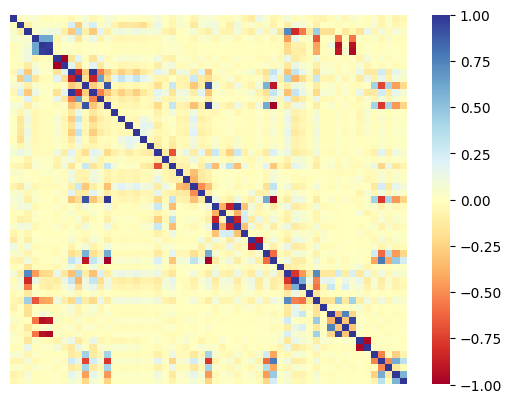

In [ ]:
# correlation heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = False, cmap = "RdYlBu", xticklabels = False, yticklabels = False)

In [ ]:
# remove highly correlated features (keeping one) -> should remove similar features like driver
corr_matrix_abs = df.corr().abs()
upper = corr_matrix_abs.where(np.triu(np.ones(corr_matrix_abs.shape), k = 1).astype(bool))
# drop features corr +- 0.95
high_corr_feat = [column for column in upper.columns if any(upper[column] > 0.95)]
df.drop(high_corr_feat, axis = 1, inplace = True)

# combine similar features
#df["back_seat"] = np.where((df["left_seat"] == 1) | (df["middle_seat"] == 1) | (df["right_seat"] == 1), 1, 0)

# columns left
df.shape[1]

<ipython-input-246-817561b50635>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_abs = df.corr().abs()


47

This brings the feature count down by almost 5 times the original (original being 236) which will not only be quicker but also allow us to produce more reliable models.

# Modelling - Traditional Machine Learning Methods

## Introduction

The project will now look at finding the best model for the data. A few will be considered, particularly some tradtional machine leanring models along with some neural networks but first, the relevant packesg will be laoded in.

In [ ]:
# machine leanrning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

#  feature selection
from sklearn.feature_selection import RFE
!pip install -q skrebate
from skrebate import ReliefF
from sklearn.feature_selection import SelectFromModel

# other
from sklearn.pipeline import Pipeline

# model selection
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# plots
from sklearn.metrics import confusion_matrix

This next chunk of code allows us to preprocess the data in one step, rather than running through the code before and missing the plots.

In [ ]:
def preprocess_df(df = raw_df):

# rename unknowns

    # replace faults with nan
    df["AGE"].replace(99, np.nan, inplace = True)

    # convert unknowns to nan
    df = df.applymap(lambda x: np.nan if "Unknown" in str(x) else x)
    df = df.applymap(lambda x: np.nan if "Not_Reported" in str(x) else x)
    df = df.applymap(lambda x: np.nan if "Not_reported" in str(x) else x)
    df = df.applymap(lambda x: np.nan if "Not_a_Fatality_(Not_Applicable)" in str(x) else x)

# remove features with +20% missing data

    # features with +20% missing data
    threshold_20 = 0.2 * df.shape[0]
    missing_vals = df.isna().sum()
    empty_features = missing_vals[missing_vals > threshold_20]
    empty_features = empty_features.index.tolist()
    df = df.drop(columns = empty_features)

# convert some features to ordinal/binary

    # case states to ordinal (to their accident frequency)
    accident_rate = df["CASE_STATE"].value_counts()
    df["CASE_STATE"] = df["CASE_STATE"].map(accident_rate)
    df.rename(columns = {"CASE_STATE": "CASE_STATE_RATE"}, inplace = True)

    # ejection to ordinal
    ejection_mapping = {
        "Totally_Ejected": 2,
        "Partially_Ejected": 1,
        "Not_Ejected": 0}

    # extrication to binary
    extrication_mapping = {
        "Extricated": 1,
        "Not_Extricated": 0}

# clean injury severity

    # makes sense, pretty irrelevant since it was nothing to do with the accident severity
    df = df[df["INJURY_SEVERITY"] != "Died_Prior_to_Accident"]

    # drop missing values in severity
    df = df.dropna(subset = ["INJURY_SEVERITY"])
    df = df.reset_index(drop = True) # reset index

# one hot encode everything

    # hide from OHE, only necessary really if this remained to be an object variable
    severity = df.pop("INJURY_SEVERITY")

    # one hot encode everything else
    categorical_variables = df.columns[df.dtypes == "object"] # identify categorical variables
    df = pd.get_dummies(df, columns = categorical_variables[:])

    # move severity to last column - easier to process
    df["INJURY_SEVERITY"] = severity

# impute missing data

    # order missing values
    missing_vals = df.isna().sum() # missing values in each feature
    missing_ordered = missing_vals.sort_values()
    missing_ordered = missing_ordered.index.tolist()

    # impute missing values with KNN
    KNN_imputer = KNNImputer(n_neighbors = 5)

    for column in missing_ordered:
        if df[column].isna().sum() > 0:
            df[column] = KNN_imputer.fit_transform(df[[column]])

# remove sparse features

    # remove sparse features
    row_count = df.shape[0]
    zero_count = (df == 0).sum(axis = 0)
    zero_percentage = (zero_count/row_count) * 100
    threshold = 99 # 1 in 100
    for column in zero_percentage.index:
        if zero_percentage[column] >= threshold:
            df = df.drop(column, axis = 1)

# remove correlated variables

    # remove highly correlated features (keeping one) -> should remove similar features like driver
    corr_matrix_abs = df.corr().abs()
    upper = corr_matrix_abs.where(np.triu(np.ones(corr_matrix_abs.shape), k = 1).astype(bool))
    # drop features corr +- 0.95
    high_corr_feat = [column for column in upper.columns if any(upper[column] > 0.95)]
    df.drop(high_corr_feat, axis = 1, inplace = True)

    return df

df = preprocess_df(raw_df)

<ipython-input-25-1d4c3d763e46>:90: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_abs = df.corr().abs()


Just before we actually get into the modelling, a few more function were created to ease the process when assessing model performance. It is probably easier to explain their function with a plot later on in the project.

In [ ]:
# confusion matrix function
def plot_confusion_matrix(actual, pred):

    # plot confusion matrix
    actual = le.inverse_transform(actual)
    pred = le.inverse_transform(pred)
    cf_matrix = confusion_matrix(actual, pred)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cf_matrix, annot = True, fmt = "d", cbar = False, cmap = "Purples")
    plt.title("Confusion Matrix")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")

# plot measures of fit for each fold
def performance_plot(micro, macro, weighted):

    # plot F1 scores
    plt.plot(range(1, len(micro) + 1), micro, marker = "o", linestyle = "-", color = "cornflowerblue", label = "micro")
    plt.plot(range(1, len(macro) + 1), macro, marker = "o", linestyle = "-", color = "g", label = "macro")
    plt.plot(range(1, len(weighted) + 1), weighted, marker = "o", linestyle = "-", color = "orangered", label = "weighted")

    # plot details
    plt.title("Performance Metrics for Each Fold")
    plt.xlabel("Fold")
    plt.ylabel("F1 Score")
    plt.legend()
    plt.grid(True)

# probability plot function
def probability_plot(actual, pred):

    # plot confusion matrix
    actual = le.inverse_transform(actual)
    pred = le.inverse_transform(pred)
    cf_matrix = confusion_matrix(actual, pred)
    class_accuracy = np.diag(cf_matrix) / np.sum(cf_matrix, axis = 0)

    # class frequency
    freq = pd.Series(actual).value_counts()
    tot = len(pd.Series(actual))
    class_freq = (freq/tot)

    # bar plot
    plt.figure(figsize=(10, 6))
    plt.plot(le.classes_, class_accuracy, color = "maroon", marker = "o")
    plt.plot(le.classes_, class_freq, color = "navy", marker = "o")
    plt.title("Class Probability of Correct Predictions")
    plt.xlabel("Classes")
    plt.ylabel("Probability")
    plt.legend(["Accuracy", "Class Percentage"])
    plt.ylim(0, 1)
    plt.grid(True)

These functions are specifically comparing the results of two models of the same algorithm.

In [ ]:
# probability plot function
def compare_probability_plot(actual1, actual2, pred1, pred2):

    # plot confusion matrix
    actual1 = le.inverse_transform(actual1)
    actual2 = le.inverse_transform(actual2)
    pred1 = le.inverse_transform(pred1)
    pred2 = le.inverse_transform(pred2)
    cf_matrix1 = confusion_matrix(actual1, pred1)
    cf_matrix2 = confusion_matrix(actual2, pred2)
    class_accuracy1 = np.diag(cf_matrix1) / np.sum(cf_matrix1, axis = 0)
    class_accuracy2 = np.diag(cf_matrix2) / np.sum(cf_matrix2, axis = 0)

    # bar plot
    plt.figure(figsize = (10, 6))
    plt.plot(le.classes_, class_accuracy1, marker = "o", color = "orange")
    plt.plot(le.classes_, class_accuracy2, marker = "o", color = "limegreen")
    plt.title("Class Probability of Correct Predictions")
    plt.xlabel("Classes")
    plt.ylabel("Probability")
    plt.legend(["Model 1", "Model 2"])
    plt.ylim(0, 1)
    plt.grid(True)

# plot measures of fit for each fold
def weighted_comparison_plot(weighted1, weighted2):

    plt.plot(range(1, len(weighted1) + 1), weighted1, marker = "o", linestyle = "-", color = "orange", label = "micro")
    plt.plot(range(1, len(weighted2) + 1), weighted2, marker = "o", linestyle = "-", color = "limegreen", label = "weighted")

    plt.title("Performance Metrics for Each Fold")
    plt.xlabel("Fold")
    plt.ylabel("F1 Weighted")
    plt.legend(["Model 1", "Model 2"])
    plt.grid(True)

Stratified K-fold cross-validation is used to ensure that each fold maintains the same class distribution as the dataset. This is useful as it prevents the case where a class is underrepresented/overrepresented in a given iteration which could introduce bias. Multiple measures of fit were also considered which were various F1 scores such as macro, micro and weighted where each are explained later in detail.

Both a gridsearch and randomised search were also perfomed, the report could have also looked at doing a smart search using TPOT. The gridsearch was used initially but due to its natural behaviour in that in attempts all hyperparamters in the grid, it became very time consuming and hence the randomised search was used. The obvious downside to using a randomised search is that the best hyperparameters were not found and an even bigger guess was necessary in order to choose the final hyperparameters. There was an attempt minimise this by producing RMSE plots of the found models, anything that behaved ridiculuously could be avoided and likewise anything performing well could be used to set the best hyperparameters in the next run of the model (hyperparamter tuning).

As mensioned in the previous paragraph, using a randomised grid search made parameter tuning difficult but ultimately this choice saved a lot of time. Due to the sample size chosen, the hyperparamters needed to be chosen carefully. It was likely that any modelled fitted to this sample data would likely be an overfit and hence we needed to combat this via some method. This included things like indrtroducing shallower (small depth), denser (more trees) forests, less neighbours and thinner roads (smaller C). The reduction in features also helpde to prevent this from happening.

Along with multiple methods of tuning, muliple methods of feature selection were considered. These methods basically find the most important features  For RandomForest, RFE (recursive feature selection) was used since it naturally provides feature imporatnace within the actual algorithm whereas KNN did not. There are methods that can introduce feature importance into the KNN algorotihm but insteaed we opted for a dffierent method, reliefF, which did not require any information on feature imporatnace. For XGBoost, another method was used, another feature imporantce based algorithm called SelectFromModel as again, XGBoost provides this information.

## RandomForest

In this first attempt to model the sample data, we will use a RandomForest algorithm that is derived from decision trees. RandomForests use an ensembling technique called bagging which involves constructing multiple trees independently on bootstrapped samples of data, taking predictions from each tree and then taking an average of these predictions. This helps it introduce diversity and reduce overfitting, giving us a more robust and accurate model.

In this next bit of code is a function that performs cross validation and fine-tuning on a set of specified hyperparameters, models, feature selection methods and data. The function is set to k = 5 folds but this can be changed and it uses stratified k-fold because the class frequencies are unequal, this helps to maintain the same class distributions within the sample data (it creates folds that represent the data better). Another note, the train and test sets did not need scaling as tree based models can deal with varying scales of data. It then runs through and collected all relevant information on the best models found and saves it to various variables.

The model could have been based on three differet performance scores. Due to it being a multiclass problem, these were: micro, macro and weighted F1 scores. Each aims to fit a particular problem, micro and weighted aim to consider the class inbalances whereas macro does not. We wanted to take into account this infrequency as, ultimately, we want to accurately predict new data coming in, ruling out macro. It was felt that, without going into too much detail, whislt considering the inbalance, we wanted the accuracy to be equal across classes rather than tailored towards the most frequent (fatal injury) and this implores us to pick weighted over micro and hence giving us the most accurate predictions on new data. We were not asked to favour a certain class, however, this can be changed if necessary.

In [ ]:
# set sample for modelling

# sample data
sample = df
#sample = df[0::10] # every 10th value

# convert data to matrix form
X = sample.iloc[:, :-1].values
y = sample.iloc[:, -1].values
cols = sample.columns

# encode target feature
le = LabelEncoder()
y = le.fit_transform(y)
#le.inverse_transform(predicted_values)

In [ ]:
# RandomForest classification with FS, CV and fine-tuning
def RandomForestClass_CV(X, y, pipeline, param_grid, k = 5):

	# initialise lists
	micros = [] # measures of accuracy
	macros = []
	weighteds = []
	preds = [] # predictions
	actuals = [] # unseen
	probs = [] # accuracy probabilities

	# k-fold CV
	kf = StratifiedKFold(n_splits = k, shuffle = True)
	for train_index, test_index in kf.split(X, y):

  		# train and test data for CV
		X_train, X_test = X[train_index], X[test_index]
		y_train, y_test = y[train_index], y[test_index]

		# searching through hyperparameter grid
		grid_search = GridSearchCV(pipeline, param_grid = param_grid, cv = kf, scoring = "f1_weighted", verbose = 0, n_jobs = -1)
		grid_search.fit(X_train, y_train)
		print("Internal CV Weighted F1 of estimator: {}".format(grid_search.best_score_))

		# best estimator
		estimator = grid_search.best_estimator_

		# features selected
		num_feat = estimator.named_steps["FS"].n_features_to_select
		col_index = np.where(estimator.named_steps["FS"].support_)[0]
		col_names = [ cols[col] for col in col_index ]
		print("Number of selected features {0}".format(num_feat))
		print("Selected features {0}".format(col_names))

  		# depth and number of trees
		print("Max depth {0}".format(estimator.named_steps["classifier"].max_depth))
		print("Number of trees {0}".format(estimator.named_steps["classifier"].n_estimators))

		# predicting the test data with the omptimised models
		predictions = estimator.predict(X_test)
		probabilities = estimator.predict_proba(X_test)
		preds.extend(predictions)
		probs.extend(probabilities)
		actuals.extend(y_test)
		micro = metrics.f1_score(y_test, predictions, average = "micro") # treats as binary
		macro = metrics.f1_score(y_test, predictions, average = "macro") # unweighted average
		weighted = metrics.f1_score(y_test, predictions, average = "weighted") # considers imbalance
		micros.append(micro)
		macros.append(macro)
		weighteds.append(weighted)
		print("Weighted F1 performance on this test set: {}".format(weighted))

		print("--------------------------------------------------")

	return micros, macros, weighteds, preds, actuals, probs

There are now 48 features left in the data now and so it seems appropriate to use a number around the 10. Since we are using a sample, we should aim to use fewer features and then give it an option to use a bit more. Again, because we are using a sample we should probably reduce the depth, setting this as about 5 and 10 should be adequate and then introducing more than average decision trees to help reduce the overfitting too.

In [ ]:
# define the classifier (RandomForest classifier) with specific parameters
classifier = RandomForestClassifier()

# RFE feature selection method
selector = RFE(classifier, n_features_to_select = 5, step = 2)

# pipeline with RandomForest and RFE
pipeline = Pipeline([("FS", selector), ("classifier", classifier)])

# define a grid of hyperparameters for both feature selector and classifier
param_grid = dict(
    FS__n_features_to_select = [5, 10, 20], # can increase overfitting
    classifier__max_depth = [5, 10], # can increase overfitting
    classifier__n_estimators = [100, 200, 300]) # can reduce overfitting

# create RandomForest model
rf_class1 = RandomForestClass_CV(X, y, pipeline, param_grid, k = 5) # 12mins

Internal CV Weighted F1 of estimator: 0.6232605292714504
Number of selected features 20
Selected features ['ALCOHOL_TEST_RESULT', 'PERSON_TYPE_Driver', 'PERSON_TYPE_Passenger_of_a_Motor_Vehicle_in_Transport', 'PERSON_TYPE_Pedestrian', 'SEATING_POSITION_Front_Seat_-_Right_Side', 'SEATING_POSITION_Non-Motorist', 'SEATING_POSITION_Second_Seat_-_Middle', 'SEATING_POSITION_Second_Seat_-_Right_Side', 'RESTRAINT_SYSTEM-USE_Lap_and_Shoulder_Belt', 'RESTRAINT_SYSTEM-USE_None_Used/Not_Applicable', 'EJECTION_Not_Ejected', 'EXTRICATION_Extricated', 'EXTRICATION_Not_Extricated', 'ALCOHOL_TEST_TYPE_Breath_BAC', 'ALCOHOL_TEST_TYPE_Not_Tested_for_Alcohol', 'ALCOHOL_TEST_TYPE_Whole_Blood', 'DRUG_TEST_TYPE_(1_of_3)_Blood_Test', 'DRUG_TEST_TYPE_(1_of_3)_Not_Tested_for_Drugs', 'TAKEN_TO_HOSPITAL_No', 'RELATED_FACTOR_(1)-PERSON_LEVEL_Not_Applicable_-_Driver/None_-_All_Other_Persons']
Max depth 10
Number of trees 100
Weighted F1 performance on this test set: 0.6097500858501754
------------------------------

It seems to have performed pretty much the same across the folds. It has consistently chosen 20 features and a depth of 10. Changing the next run to suit these will be a good idea. It seems to vary in its choice of density, centring around this average of 200 would seem like a good choice. Lets just look at the performance though first.

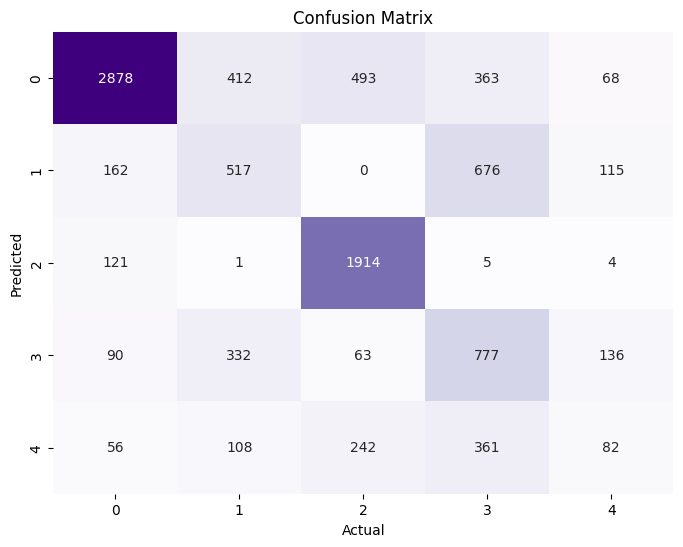

In [ ]:
# plot confusion matrix
plot_confusion_matrix(rf_class1[4], rf_class1[3])

Just a note, 0, 1, 2, 3, 4 indicate: fatal, incapacitating, no injury, no evident incapacitating injury and possible injury, respectively. It seemed better to represent this in terms of numbers.

The numbers here indicate how many times the model predicted each class for each actual class in the test set using a weighted F1 average. The diagonal from the top left to bottom right shows a correct prediction and from the plot, it seems that every time bar once the model is correct on average.

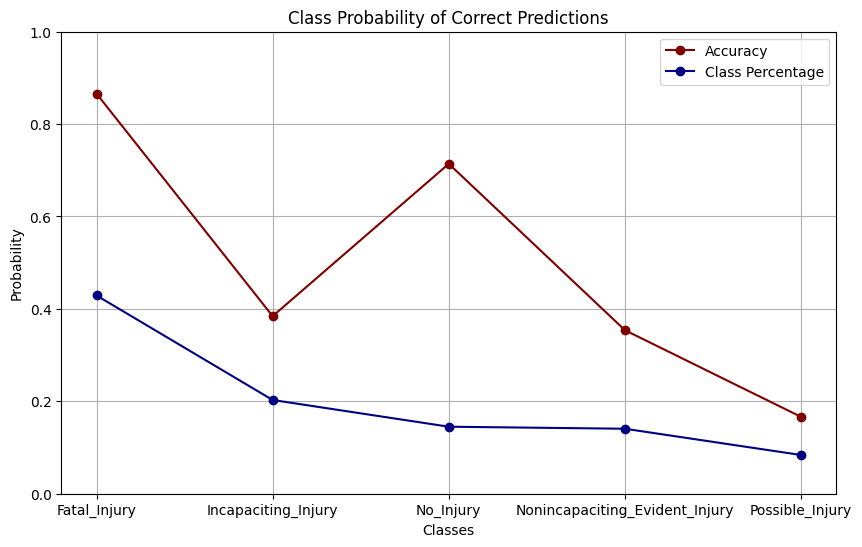

In [ ]:
# probability plot
probability_plot(rf_class1[4], rf_class1[3])

This aims to show the most important results from the previous, the further to the left indicating its occurrence frequency within the data. We can see that the model achieve a high percentage of correct predictions for fatal accidents in particular, a decent result for no injuries and a fairly poor result in the others.

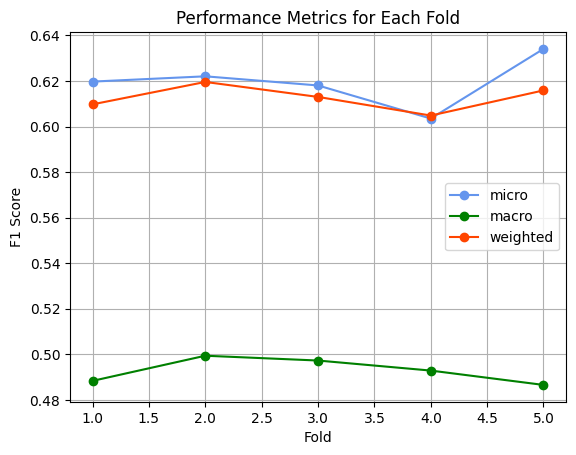

In [ ]:
# plot performance of model
performance_plot(rf_class1[0], rf_class1[1], rf_class1[2])

It can be seen that the macro score is much lower and the other two are fairly similar, which is expected as they aim to capture similar things. This will be more interesting when we compare it with another model but it is nice to check that the general pattern in weighted holds for the other scores too.

On this note, we create a new RandomForest based on the suggestions given above where class weight is set to balanced again to ensure the model is not biased towards a majority class. This results in better models.

In [ ]:
# define the classifier (RandomForest classifier) with specific parameters
classifier = RandomForestClassifier()
# RFE feature selection method
selector = RFE(classifier, n_features_to_select = 5, step = 5)

# pipeline with RandomForest and RFE
pipeline = Pipeline([("FS", selector), ("classifier", classifier)])

# define a grid of hyperparameters for both feature selector and classifier
param_grid = dict(
    FS__n_features_to_select = [20, 25, 30],
    classifier__max_depth = [10, 15, 20],
    classifier__n_estimators = [150, 200, 250])

# create RandomForest model
rf_class2 = RandomForestClass_CV(X, y, pipeline, param_grid, k = 5) # 19mins

Internal CV Weighted F1 of estimator: 0.6324881522335378
Number of selected features 30
Selected features ['AGE', 'ALCOHOL_TEST_RESULT', 'DRUG_TEST_RESULTS_(1_of_3)', 'DRUG_TEST_RESULTS_(2_of_3)', 'SEX_Female', 'PERSON_TYPE_Driver', 'PERSON_TYPE_Passenger_of_a_Motor_Vehicle_in_Transport', 'PERSON_TYPE_Pedestrian', 'SEATING_POSITION_Front_Seat_-_Right_Side', 'SEATING_POSITION_Non-Motorist', 'SEATING_POSITION_Other_Passenger_in_enclosed_passenger_or_cargo_area', 'SEATING_POSITION_Second_Seat_-_Middle', 'SEATING_POSITION_Second_Seat_-_Right_Side', 'RESTRAINT_SYSTEM-USE_Lap_and_Shoulder_Belt', 'RESTRAINT_SYSTEM-USE_None_Used/Not_Applicable', 'AIR_BAG_AVAILABILITY/DEPLOYMENT_Air_Bad_Available-Deployment_Not_Known_for_this_Seat', 'AIR_BAG_AVAILABILITY/DEPLOYMENT_Air_Bag_Not_Available_for_this_Seat', 'AIR_BAG_AVAILABILITY/DEPLOYMENT_Deployed_Air_Bag_from_Front', 'EJECTION_Not_Ejected', 'EJECTION_Totally_Ejected', 'EJECTION_PATH_Through_Side_Window', 'EXTRICATION_Extricated', 'EXTRICATION_Not_

For a lot of these models, the internal score is higher than the test score indicating that we may have overfitted the data but not necessarily. We would need more folds to determine this but there is certainly reason to suggest this.

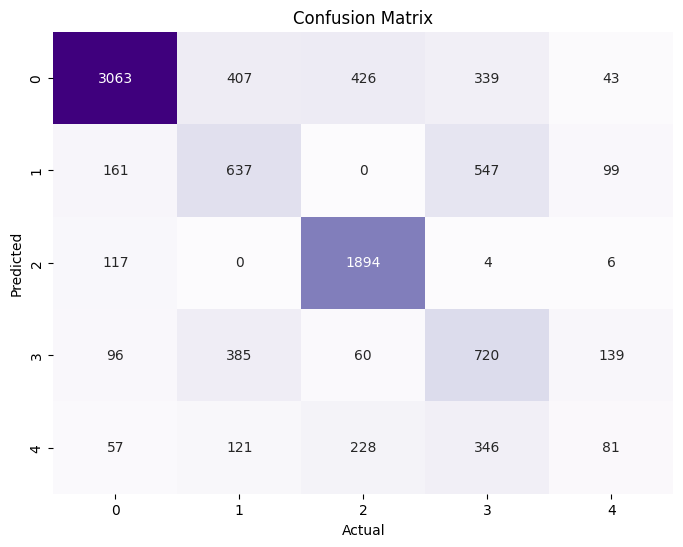

In [ ]:
# plot confusion matrix
plot_confusion_matrix(rf_class2[4], rf_class2[3])

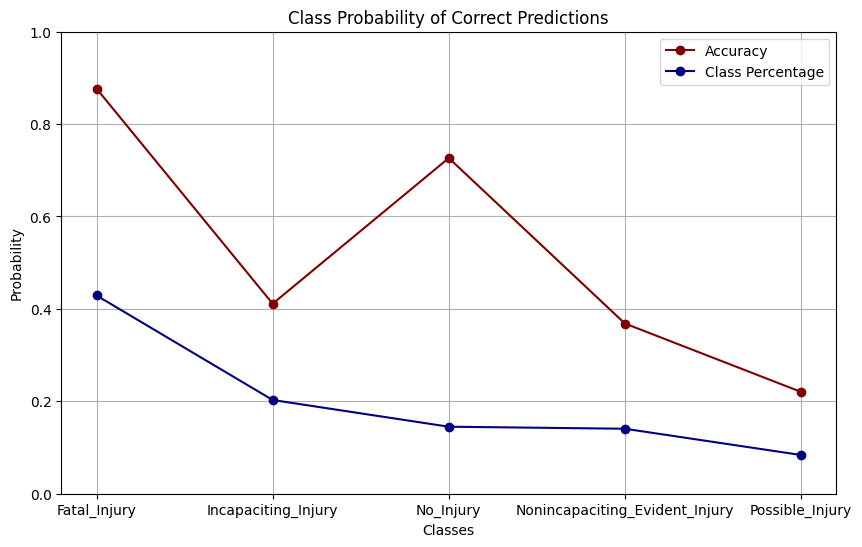

In [ ]:
# probability plot
probability_plot(rf_class2[4], rf_class2[3])

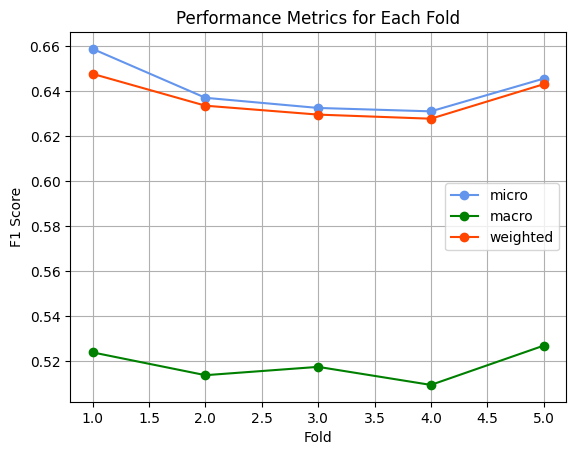

In [ ]:
# plot performance of model
performance_plot(rf_class2[0], rf_class2[1], rf_class2[2])

The patterns hold across scores again.

Comparing the model performance gives the following. It seems the best model is the first one of model 2. Generally, since we are working on the same data in each fold we would expect anything disrupting the model for the fold to distrupt it across each one. In other words we expect a similar shaped line between the two models. This makes this first model seem even better than the one performed in the other iteration, at the same fold. It turns out this is a model of 30 features, max depth of 10 and 250 trees.

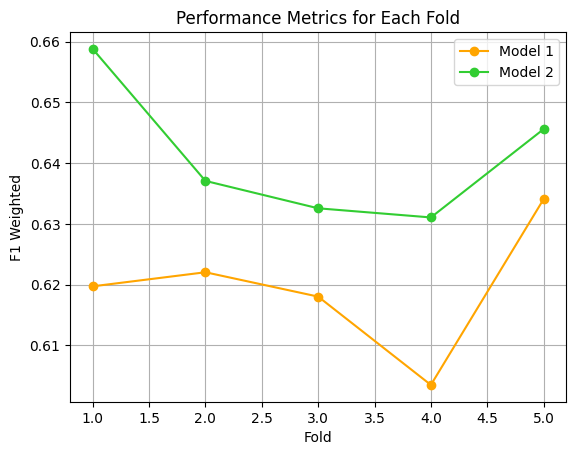

In [ ]:
# plot performance of models
weighted_comparison_plot(rf_class1[0], rf_class2[0])

## K-nearest Neighbours

In KNN, an instance is classified by a majority vote from its k nearest neighbours in the feature space. The algorithm calculates the distance between the instance to be classified and all other instances in the dataset, selects the k nearest neighbours, and assigns the class label based on the most frequent class among these neighbours. The additional benefit of these machine models is, as mentioned, that they do not make assumptions about the data.

In [ ]:
# set sample for modelling

# sample data
sample = df.sample(n = 9976, random_state = 2001) # approx 10% of data
#sample = df[0::10] # every 10th value

# convert data to matrix form
X = sample.iloc[:, :-1].values
y = sample.iloc[:, -1].values
cols = sample.columns

# encode target feature
le = LabelEncoder()
y = le.fit_transform(y)
#le.inverse_transform(predicted_values)

In [ ]:
# KNN classification with FS, CV and fine-tuning
def KNearestNeighboursClass_CV(X, y, pipeline, param_grid, k = 3):

	# initialise lists
	micros = []
	macros = []
	weighteds = []
	preds = []
	actuals = []

	# k-fold CV
	kf = StratifiedKFold(n_splits = k, shuffle = True)
	for train_index, test_index in kf.split(X, y):

  		# train and test data for CV
		X_train, X_test = X[train_index], X[test_index]
		y_train, y_test = y[train_index], y[test_index]

		# scale data
		scaler = StandardScaler()
		X_train, X_test = scaler.fit_transform(X_train), scaler.fit_transform(X_test)

		# searching through hyperparameter grid
		grid_search = RandomizedSearchCV(pipeline, param_distributions = param_grid, cv = 5, scoring = "f1_weighted", verbose = 0, n_jobs = -1, n_iter = 1)
		grid_search.fit(X_train, y_train)
		print("Internal CV Weighted F1 of estimator: {}".format(grid_search.best_score_))

  		# best estimator
		estimator = grid_search.best_estimator_

		# features selected
		num_feat = estimator.named_steps["FS"].n_features_to_select
		feat_neighbours = estimator.named_steps["FS"].n_neighbors
		col_index = estimator.named_steps["FS"].top_features_[0:num_feat]
		col_names = [cols[col] for col in col_index]
		print("Number of selected features {0}".format(num_feat))
		print("Number of feature neighbours selected {0}".format(feat_neighbours))
		print("Selected features {0}".format(col_names))

  		# number of neighbours
		print("Number of neighbours {0}".format(estimator.named_steps["classifier"].n_neighbors))

		# predicting the test data with the omptimised models
		predictions = estimator.predict(X_test)
		preds.extend(predictions)
		actuals.extend(y_test)
		micro = metrics.f1_score(y_test, predictions, average = "micro")
		macro = metrics.f1_score(y_test, predictions, average = "macro") # unweighted average
		weighted = metrics.f1_score(y_test, predictions, average = "weighted") # considers imbalance
		micros.append(micro)
		macros.append(macro)
		weighteds.append(weighted)
		print("Weighted F1 performance on this test set: {}".format(weighted))

		print("--------------------------------------------------")

	return micros, macros, weighteds, preds, actuals

Again, due to the fact the models are trained on a smaller subset of the data, the hyperparameters will be chosen more appropriately. This means fewer features and fewer neighbours for both the machine learning algorithm and the feature selection method. KNN does not implicity value features importance as such, although this can be introduced using a separate package, and hence a new method was used. This is the case with the next model too, SVC.

In [ ]:
# define the classifier (KNN classifier) with specific parameters
classifier = KNeighborsClassifier()

# ReliefF feature selection method
selector = ReliefF(n_features_to_select = 10, n_neighbors = 10)

# pipeline with KNN and ReliefF
pipeline = Pipeline([("FS", selector), ("classifier", classifier)])

# define a grid of hyperparameters for both feature selector and classifier
param_grid = dict(
    FS__n_features_to_select = [5, 20],
    FS__n_neighbors = [3, 10],
    classifier__n_neighbors = [3, 10]) # 6 iterations

# create RandomForest model
knn_class1 = KNearestNeighboursClass_CV(X, y, pipeline, param_grid, k = 3)

Internal CV Weighted F1 of estimator: 0.4381825448261238
Number of selected features 5
Number of feature neighbours selected 3
Selected features ['TAKEN_TO_HOSPITAL_No', 'CASE_STATE_RATE', 'EJECTION_Not_Ejected', 'AGE', 'EXTRICATION_Not_Extricated']
Number of neighbours 3
Weighted F1 performance on this test set: 0.444933720108434
--------------------------------------------------
Internal CV Weighted F1 of estimator: 0.42657132174710116
Number of selected features 5
Number of feature neighbours selected 10
Selected features ['TAKEN_TO_HOSPITAL_No', 'EJECTION_Not_Ejected', 'CASE_STATE_RATE', 'EXTRICATION_Not_Extricated', 'EXTRICATION_Extricated']
Number of neighbours 3
Weighted F1 performance on this test set: 0.4302789977736518
--------------------------------------------------
Internal CV Weighted F1 of estimator: 0.5774149935628856
Number of selected features 20
Number of feature neighbours selected 3
Selected features ['TAKEN_TO_HOSPITAL_No', 'CASE_STATE_RATE', 'EJECTION_Not_Ejecte

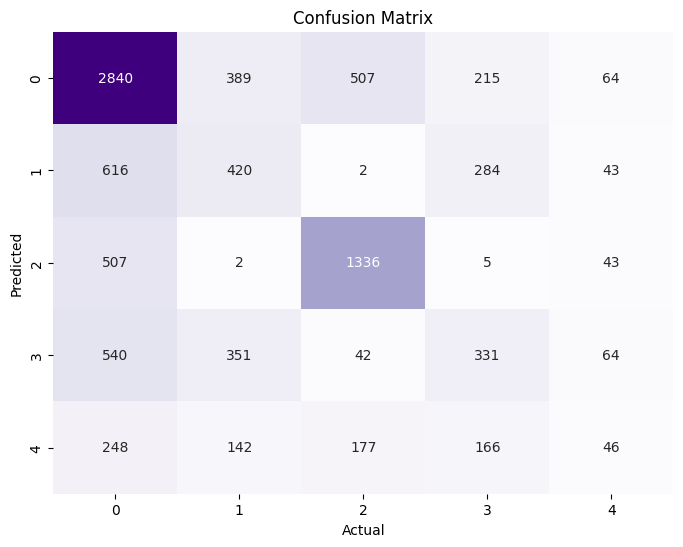

In [ ]:
# plot confusion matrix
plot_confusion_matrix(knn_class1[4], knn_class1[3])

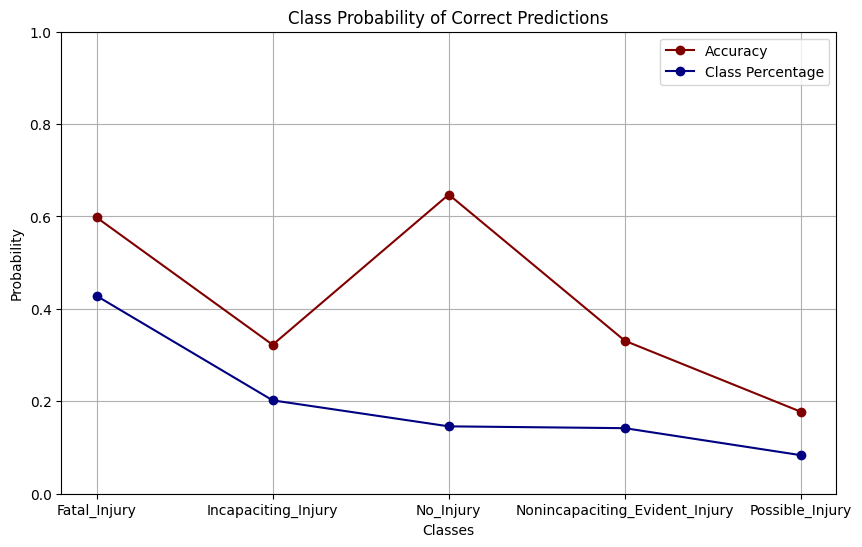

In [ ]:
# probability plot
probability_plot(knn_class1[4], knn_class1[3])

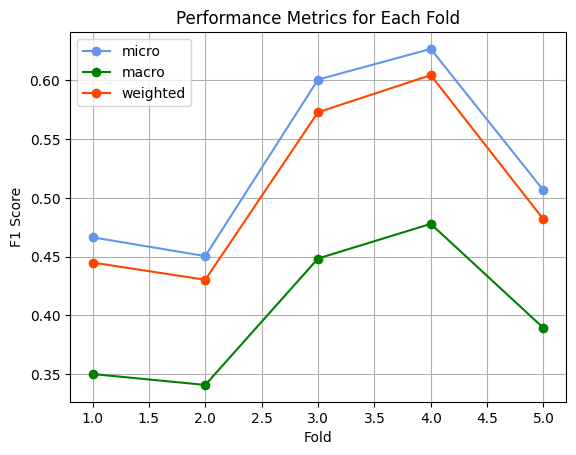

In [ ]:
# plot performance of model
performance_plot(knn_class1[0], knn_class1[1], knn_class1[2])

## Support Vector Classification

Support vector machines (SVMs) create a hyperplane in high-dimensional space to effectively separate the classes. It aims to maximise the margin between the classes (the distance between the plane and observation). It is particularly robust to overfitting but the choice of kernel is significant. The kernel gives a way to calculate positions in higher dimensional space without actually calculating it. Ideally, there is hope that there is a clear boundary between the classes.

In [ ]:
# SVC classification with FS, CV and fine-tuning
def SVC_CV(X, y, pipeline, param_grid, k = 5):

	# initialise lists
	micros = []
	macros = []
	weighteds = []
	preds = []
	actuals = []

	# k-fold CV
	kf = StratifiedKFold(n_splits = k, shuffle = True)
	for train_index, test_index in kf.split(X, y):

  		# train and test data for CV
		X_train, X_test = X[train_index], X[test_index]
		y_train, y_test = y[train_index], y[test_index]

		# scale data
		scaler = StandardScaler()
		X_train, X_test = scaler.fit_transform(X_train), scaler.fit_transform(X_test)

		# searching through hyperparameter grid
		grid_search = RandomizedSearchCV(pipeline, param_distributions = param_grid, cv = 5, scoring = "f1_weighted", verbose = 0, n_jobs = -1, n_iter = 2) # n_iter is amount of times it will look through grid, best is picked
		grid_search.fit(X_train, y_train)
		print("Internal CV Weighted F1 of estimator: {}".format(grid_search.best_score_))

		# best estimator
		estimator = grid_search.best_estimator_

 	 	# features selected
		num_feat = estimator.named_steps["FS"].n_features_to_select
		feat_neighbours = estimator.named_steps["FS"].n_neighbors
		col_index = estimator.named_steps["FS"].top_features_[0:num_feat]
		col_names = [ cols[col] for col in col_index ]
		print("Number of selected features {0}".format(num_feat))
		print("Number of neighbours selected {0}".format(feat_neighbours))
		print("Selected features {0}".format(col_names))

		# SVC parameters
		print("SVC kernel: {}".format(estimator.named_steps["classifier"].kernel)) # kernel selected
		print("SVC C: {}".format(estimator.named_steps["classifier"].C)) # C selected

		# predicting the test data with the omptimised models
		predictions = estimator.predict(X_test)
		preds.extend(predictions)
		actuals.extend(y_test)
		micro = metrics.f1_score(y_test, predictions, average = "micro")
		macro = metrics.f1_score(y_test, predictions, average = "macro") # unweighted average
		weighted = metrics.f1_score(y_test, predictions, average = "weighted") # considers imbalance
		micros.append(micro)
		macros.append(macro)
		weighteds.append(weighted)
		print("Weighted F1 performance on this test set: {}".format(weighted))

		print("--------------------------------------------------")

	return micros, macros, weighteds, preds, actuals

In [ ]:
# define the classifier (SV classifier) with specific parameters
classifier = SVC(kernel = "linear", C = 1, gamma = "scale", decision_function_shape = "ovr", probability = True)

# ReliefF feature selection method
selector = ReliefF(n_features_to_select = 10, n_neighbors = 10)

# pipeline with SVM and RFE
pipeline = Pipeline([("FS", selector), ("classifier", classifier)])

# define a grid of hyperparameters for both feature selector and classifier
param_grid = dict(
    FS__n_features_to_select = [5, 20],
    FS__n_neighbors = [3, 10],
    classifier__kernel = ["rbf"], # could try linear
    classifier__C = [0.1, 100]) # margin size

# create SVM model
SVM_class1 = SVC_CV(X, y, pipeline, param_grid, k = 3) # 1hr19mins

Internal CV Weighted F1 of estimator: 0.3781584966227992
Number of selected features 5
Number of neighbours selected 3
Selected features ['TAKEN_TO_HOSPITAL_No', 'CASE_STATE_RATE', 'EJECTION_Not_Ejected', 'EXTRICATION_Not_Extricated', 'EXTRICATION_Extricated']
SVC kernel: rbf
SVC C: 0.1
Weighted F1 performance on this test set: 0.3863258553187958
--------------------------------------------------
Internal CV Weighted F1 of estimator: 0.3812767751001992
Number of selected features 5
Number of neighbours selected 3
Selected features ['TAKEN_TO_HOSPITAL_No', 'CASE_STATE_RATE', 'EJECTION_Not_Ejected', 'EXTRICATION_Not_Extricated', 'EXTRICATION_Extricated']
SVC kernel: rbf
SVC C: 0.1
Weighted F1 performance on this test set: 0.37386470730518806
--------------------------------------------------
Internal CV Weighted F1 of estimator: 0.5962995393951778
Number of selected features 20
Number of neighbours selected 3
Selected features ['TAKEN_TO_HOSPITAL_No', 'CASE_STATE_RATE', 'EJECTION_Not_Eje

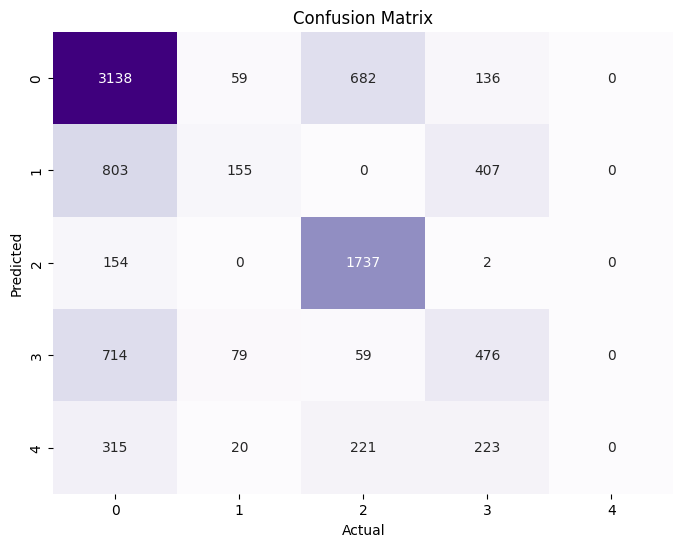

In [ ]:
# plot confusion matrix
plot_confusion_matrix(SVM_class1[4], SVM_class1[3])

<ipython-input-13-ae691f88beb7>:8: RuntimeWarning: invalid value encountered in divide
  class_accuracy = np.diag(cf_matrix) / np.sum(cf_matrix, axis = 0)


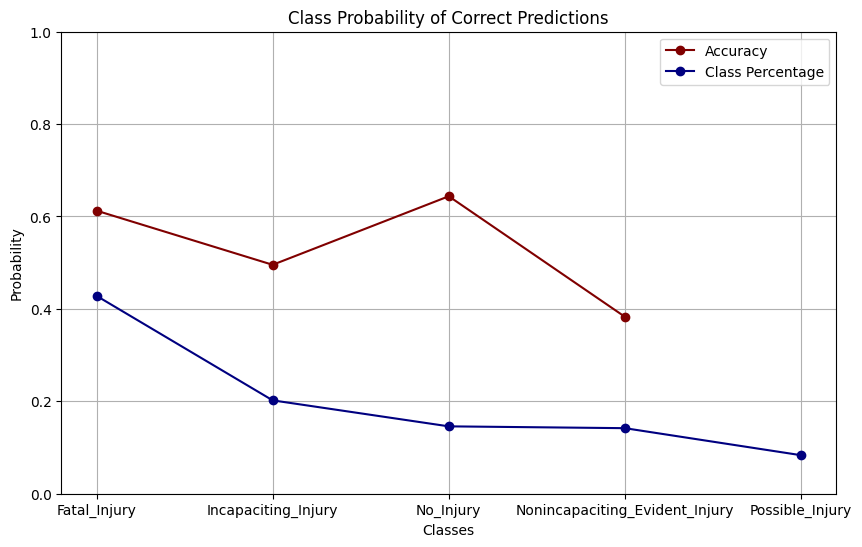

In [ ]:
# probability plot
probability_plot(SVM_class1[4], SVM_class1[3])

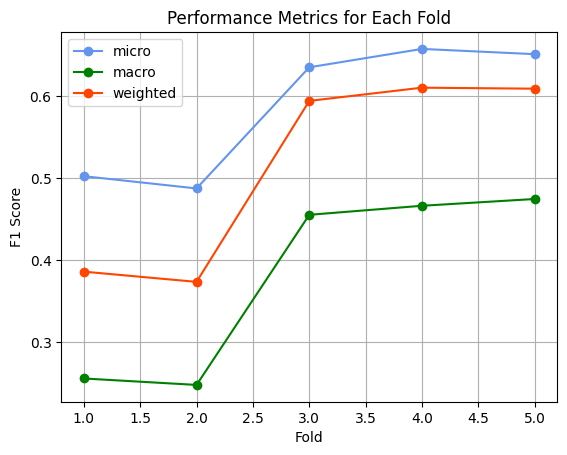

In [ ]:
# plot performance of model
performance_plot(SVM_class1[0], SVM_class1[1], SVM_class1[2])

## AdaBoost

This is another ensemble tree-based algorithm like RandomForest. This method looks at using weak learners (stumps or trees of depth 1) and each is trained sequentially where miss-classes are assigned a larger weight to correct previous mistakes. AdaBoost is sensitive to outliers however whereas RandomForest is not. If we reduce the learning rate we should conisder increasing the stumps.

In [ ]:
# set sample for modelling

# sample data
sample = df
#sample = df[0::10] # every 10th value

# convert data to matrix form
X = sample.iloc[:, :-1].values
y = sample.iloc[:, -1].values
cols = sample.columns

# encode target feature
le = LabelEncoder()
y = le.fit_transform(y)
#le.inverse_transform(predicted_values)

In [ ]:
# AdaBoost classification with FS, CV and fine-tuning
def AdaBoostClass_CV(X, y, pipeline, param_grid, k = 5):

    # initialise lists
    micros = []
    macros = []
    weighteds = []
    preds = []
    actuals = []

    # k-fold CV
    kf = StratifiedKFold(n_splits = k, shuffle = True)
    for train_index, test_index in kf.split(X, y):

        # train and test data for CV
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # finding optimal models, hyperparameter tuning
        grid_search = RandomizedSearchCV(pipeline, param_distributions = param_grid, cv = kf, scoring = "f1_weighted", verbose = 0, n_jobs = -1, n_iter = 2) # sequential so should set n_jobs to 1
        grid_search.fit(X_train, y_train)
        print("Internal CV Weighted F1 of estimator: {}".format(grid_search.best_score_))

        # number of features selected
        estimator = grid_search.best_estimator_

        # Access the SelectFromModel transformer and get the support mask
        support = estimator.named_steps['FS'].get_support()
        num_feat = np.sum(support)
        print("Number of selected features {0}".format(num_feat))

        # features selected
        col_index = np.where(support)[0]
        col_names = [cols[col] for col in col_index]
        print("Selected features {0}".format(col_names))

        # number of trees and learning rate
        print("Number of trees {0}".format(estimator.named_steps["classifier"].n_estimators))
        print("Learning rate {0}".format(estimator.named_steps["classifier"].learning_rate))

        # predicting the test data with the omptimised models
        predictions = estimator.predict(X_test)
        preds.extend(predictions)
        actuals.extend(y_test)
        micro = metrics.f1_score(y_test, predictions, average = "micro") # treats as binary
        macro = metrics.f1_score(y_test, predictions, average = "macro") # unweighted average
        weighted = metrics.f1_score(y_test, predictions, average = "weighted") # considers imbalance
        micros.append(micro)
        macros.append(macro)
        weighteds.append(weighted)
        print("Weighted F1 performance on this test set: {}".format(weighted))

        print("--------------------------------------------------")

    return micros, macros, weighteds, preds, actuals

First we considered a SelectFromModel feature selection for no particular reason other than trying another feature selection method. This was fairly hefty so we reduced the brute force method to a randomised search which allowed us to save significant time but at the expense of maybe not finding the best hyperparameters. Similarly with RandomForest, these estimators seemed appropriate and the learning rate was adjusted to consider the lack of data by reducing the learning rate.

In [ ]:
# AdaBoost classifier (with specific parameters)
classifier = AdaBoostClassifier()

# feature selection with SelectFromModel
selector = SelectFromModel(classifier)

# pipeline with AdaBoost and SelectFromModel
pipeline = Pipeline([("FS", selector), ("classifier", classifier)])

# hyperparameters for AdaBoost and feature selector
param_grid = dict(
    FS__threshold = ["mean", "median"],
    classifier__n_estimators = [100, 200, 300],
    classifier__learning_rate = [0.01, 0.1, 0.5])

adab_class1 = AdaBoostClass_CV(X, y, pipeline, param_grid, k = 5) # 13mins

Internal CV Weighted F1 of estimator: 0.5971446883798801
Number of selected features 9
Selected features ['AGE', 'DRUG_TEST_RESULTS_(1_of_3)', 'SEATING_POSITION_Non-Motorist', 'RESTRAINT_SYSTEM-USE_Motorcycle_Helmet', 'RESTRAINT_SYSTEM-USE_None_Used/Not_Applicable', 'EJECTION_Not_Ejected', 'EXTRICATION_Extricated', 'ALCOHOL_TEST_TYPE_Whole_Blood', 'TAKEN_TO_HOSPITAL_No']
Number of trees 200
Learning rate 0.5
Weighted F1 performance on this test set: 0.6024491871267503
--------------------------------------------------
Internal CV Weighted F1 of estimator: 0.5166420196810508
Number of selected features 9
Selected features ['AGE', 'DRUG_TEST_RESULTS_(1_of_3)', 'SEATING_POSITION_Non-Motorist', 'RESTRAINT_SYSTEM-USE_Motorcycle_Helmet', 'RESTRAINT_SYSTEM-USE_None_Used/Not_Applicable', 'EJECTION_Not_Ejected', 'EXTRICATION_Extricated', 'ALCOHOL_TEST_TYPE_Whole_Blood', 'TAKEN_TO_HOSPITAL_No']
Number of trees 300
Learning rate 0.01
Weighted F1 performance on this test set: 0.5028106377136395
--

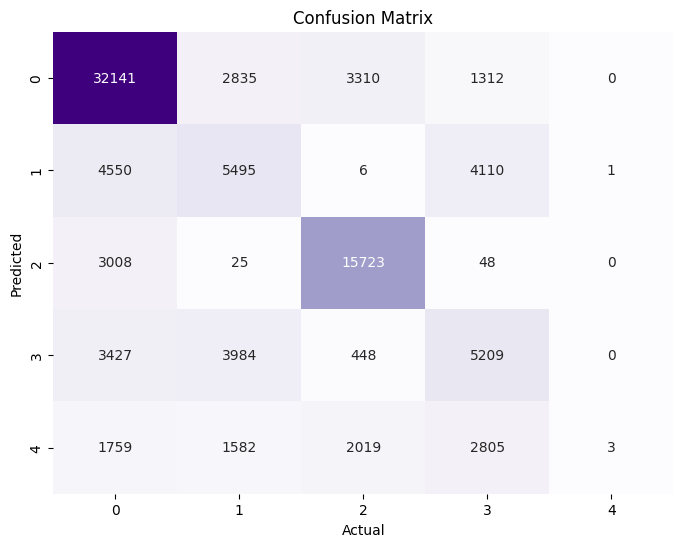

In [ ]:
# plot confusion matrix
plot_confusion_matrix(adab_class1[4], adab_class1[3])

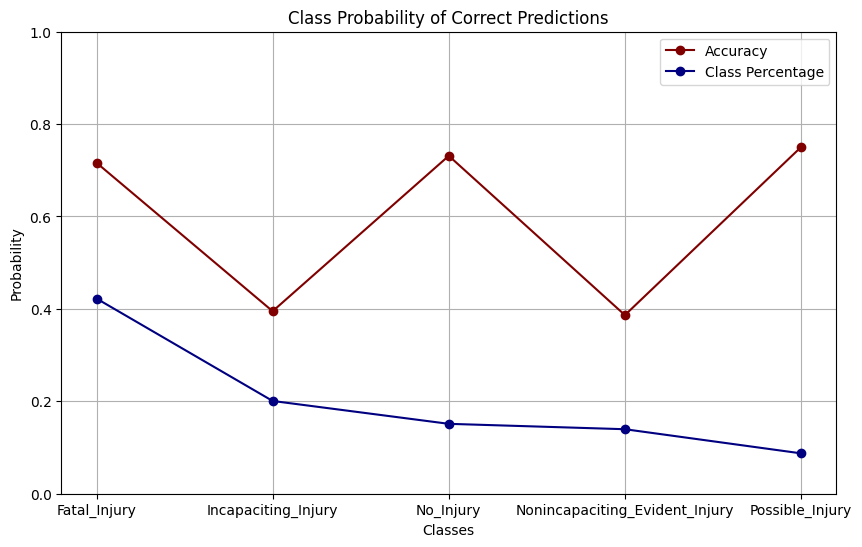

In [ ]:
# probability plot
probability_plot(adab_class1[4], adab_class1[3])

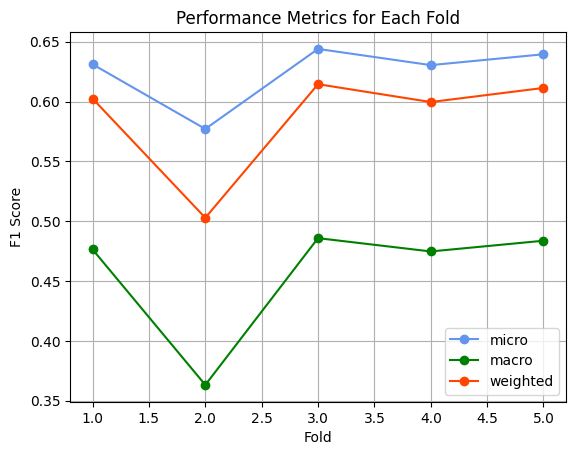

In [ ]:
# plot performance of model
performance_plot(adab_class1[0], adab_class1[1], adab_class1[2])

It seems that a 300 tree with learning rate 0.01 was a bad decision, maybe it could not converge in time with its slow learning rate. The good models were a 300 tree incombination with a faster leanring rate of 0.1. Lets allow it a chance to use more trees as it seems to use the max, again thinking that this could just be because of the randomised nature of the model, and picking a middle value between 0.1 and 0.5.

In [ ]:
# AdaBoost classifier (with specific parameters)
classifier = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.1)

# feature selection with SelectFromModel
selector = SelectFromModel(classifier)

# pipeline with AdaBoost and SelectFromModel
pipeline = Pipeline([("FS", selector), ("classifier", classifier)])

# hyperparameters for AdaBoost and feature selector
param_grid = dict(
    FS__threshold = ["mean", "median"],
    classifier__n_estimators = [300, 400],
    classifier__learning_rate = [0.1, 0.25])

adab_class1 = AdaBoostClass_CV(X, y, pipeline, param_grid, k = 5) # 13mins

Internal CV Weighted F1 of estimator: 0.5447221678957673
Number of selected features 47
Selected features ['CASE_STATE_RATE', 'AGE', 'ALCOHOL_TEST_RESULT', 'DRUG_TEST_RESULTS_(1_of_3)', 'DRUG_TEST_RESULTS_(2_of_3)', 'SEX_Female', 'PERSON_TYPE_Driver', 'PERSON_TYPE_Passenger_of_a_Motor_Vehicle_in_Transport', 'PERSON_TYPE_Pedestrian', 'SEATING_POSITION_Front_Seat_-_Right_Side', 'SEATING_POSITION_Non-Motorist', 'SEATING_POSITION_Other_Passenger_in_enclosed_passenger_or_cargo_area', 'SEATING_POSITION_Second_Seat_-_Left_Side', 'SEATING_POSITION_Second_Seat_-_Middle', 'SEATING_POSITION_Second_Seat_-_Right_Side', 'RESTRAINT_SYSTEM-USE_Child_Safety_Seat', 'RESTRAINT_SYSTEM-USE_Lap_Belt', 'RESTRAINT_SYSTEM-USE_Lap_and_Shoulder_Belt', 'RESTRAINT_SYSTEM-USE_Motorcycle_Helmet', 'RESTRAINT_SYSTEM-USE_None_Used/Not_Applicable', 'AIR_BAG_AVAILABILITY/DEPLOYMENT_Air_Bad_Available-Deployment_Not_Known_for_this_Seat', 'AIR_BAG_AVAILABILITY/DEPLOYMENT_Air_Bag_Available_but_Not_Deployed_for_this_Seat', 'A

It seems that these performed worsely and that a AdaBoost of 300 trees, learning rate 0.1 and uses all features is best. We could tree other values but we would need more time.

## Gradient Boosting

Similar to AdaBoost in that it builds a series of weak learners sequentially but instead it aims to minimise a loss function with respect to its predictions. It is also a tree based ensemble with boosting.

In [ ]:
# set sample for modelling

# sample data
sample = df.sample(n = 9976, random_state = 2001) # approx 10% of data
#sample = df[0::10] # every 10th value

# convert data to matrix form
X = sample.iloc[:, :-1].values
y = sample.iloc[:, -1].values
cols = sample.columns

# encode target feature
le = LabelEncoder()
y = le.fit_transform(y)
#le.inverse_transform(predicted_values)

In [ ]:
# Gradient Boosting classification with FS, CV and fine-tuning
def GradientBoostClass_CV(X, y, pipeline, param_grid, k = 5):

    # initialise lists
    micros = []
    macros = []
    weighteds = []
    preds = []
    actuals = []

    # k-fold CV
    kf = StratifiedKFold(n_splits = k, shuffle = True)
    for train_index, test_index in kf.split(X, y):

        # train and test data for CV
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # finding optimal models, hyperparameter tuning
        grid_search = RandomizedSearchCV(pipeline, param_distributions = param_grid, cv = kf, scoring = "f1_weighted", verbose = 0, n_jobs = -1, n_iter = 2)
        grid_search.fit(X_train, y_train)
        print("Internal CV Weighted F1 of estimator: {}".format(grid_search.best_score_))

        # number of features selected
        estimator = grid_search.best_estimator_

        # Access the SelectFromModel transformer and get the support mask
        support = estimator.named_steps['FS'].get_support()
        num_feat = np.sum(support)
        print("Number of selected features {0}".format(num_feat))

        # features selected
        col_index = np.where(support)[0]
        col_names = [cols[col] for col in col_index]
        print("Selected features {0}".format(col_names))

        # depth, number of trees and learning rate
        print("Max depth {0}".format(estimator.named_steps["classifier"].max_depth))
        print("Number of trees {0}".format(estimator.named_steps["classifier"].n_estimators))
        print("Learning rate {0}".format(estimator.named_steps["classifier"].learning_rate))

        # predicting the test data with the omptimised models
        predictions = estimator.predict(X_test)
        preds.extend(predictions)
        actuals.extend(y_test)
        micro = metrics.f1_score(y_test, predictions, average = "micro") # treats as binary
        macro = metrics.f1_score(y_test, predictions, average = "macro") # unweighted average
        weighted = metrics.f1_score(y_test, predictions, average = "weighted") # considers imbalance
        micros.append(micro)
        macros.append(macro)
        weighteds.append(weighted)
        print("Weighted F1 performance on this test set: {}".format(weighted))

        print("--------------------------------------------------")

    return micros, macros, weighteds, preds, actuals

In [ ]:
# Gradient Boosting classifier (with specific parameters)
classifier = GradientBoostingClassifier()

# feature selection with SelectFromModel
selector = SelectFromModel(classifier)

# pipeline with Gradient Boosting and SelectFromModel
pipeline = Pipeline([("FS", selector), ("classifier", classifier)])

# hyperparameters for Gradient Boosting and feature selector
param_grid = dict(
    FS__threshold = ["mean", "median"],
    classifier__n_estimators = [100, 200, 300],
    classifier__max_depth = [1, 2],
    classifier__learning_rate = [0.01, 0.1, 0.5])

gradb_class1 = GradientBoostClass_CV(X, y, pipeline, param_grid, k = 5) # 60mins

Internal CV Weighted F1 of estimator: 0.649041626723603
Number of selected features 24
Selected features ['CASE_STATE_RATE', 'AGE', 'ALCOHOL_TEST_RESULT', 'DRUG_TEST_RESULTS_(1_of_3)', 'SEX_Female', 'PERSON_TYPE_Driver', 'PERSON_TYPE_Passenger_of_a_Motor_Vehicle_in_Transport', 'SEATING_POSITION_Front_Seat_-_Right_Side', 'SEATING_POSITION_Non-Motorist', 'SEATING_POSITION_Other_Passenger_in_enclosed_passenger_or_cargo_area', 'RESTRAINT_SYSTEM-USE_Lap_and_Shoulder_Belt', 'RESTRAINT_SYSTEM-USE_Motorcycle_Helmet', 'RESTRAINT_SYSTEM-USE_None_Used/Not_Applicable', 'AIR_BAG_AVAILABILITY/DEPLOYMENT_Deployed_Air_Bag_from_Front', 'EJECTION_Not_Ejected', 'EXTRICATION_Extricated', 'EXTRICATION_Not_Extricated', 'ALCOHOL_TEST_TYPE_Breath_BAC', 'ALCOHOL_TEST_TYPE_Not_Tested_for_Alcohol', 'ALCOHOL_TEST_TYPE_Whole_Blood', 'DRUG_TEST_TYPE_(1_of_3)_Blood_Test', 'DRUG_TEST_TYPE_(1_of_3)_Not_Tested_for_Drugs', 'TAKEN_TO_HOSPITAL_No', 'RELATED_FACTOR_(1)-PERSON_LEVEL_Not_Applicable_-_Driver/None_-_All_Other_

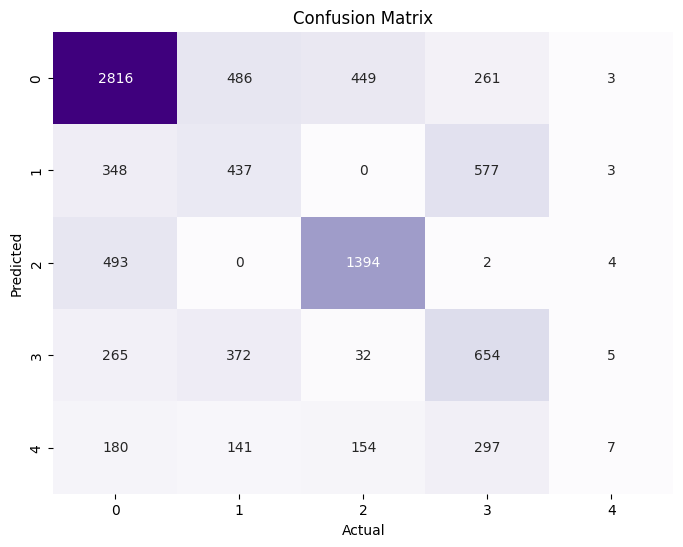

In [ ]:
# plot confusion matrix
plot_confusion_matrix(adab_class1[4], adab_class1[3])

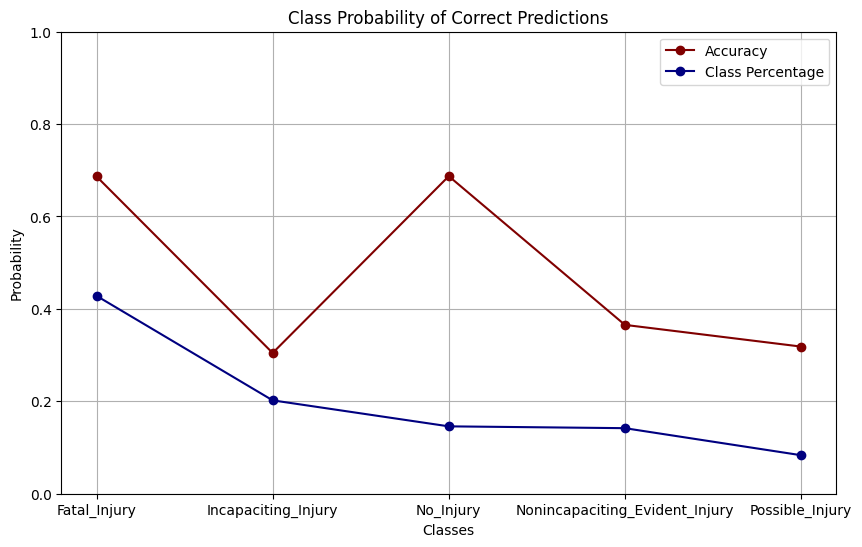

In [ ]:
# probability plot
probability_plot(adab_class1[4], adab_class1[3])

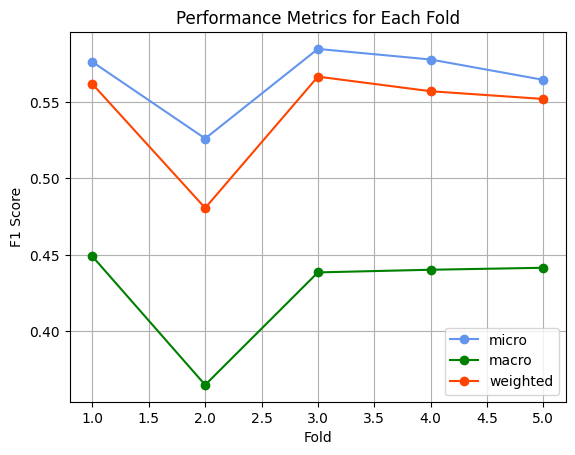

In [ ]:
# plot performance of model
performance_plot(adab_class1[0], adab_class1[1], adab_class1[2])

This depth 2, 300 tree Gradient Boosting model with learning rate 0.5 seems to be best. We can also see that 2 is very consistantly good, maybe a higher 3 might be good too but we have to remember that the model might not have get round to trying 1, but 66% is one of the best so far so lets push it. 0.1 learning rate seems to be a good try and we could also see what 1 does too. The density seems to be a goo pick so we will stick with this, these are good models.

In [ ]:
# Gradient Boosting classifier (with specific parameters)
classifier = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1)

# feature selection with SelectFromModel
selector = SelectFromModel(classifier)

# pipeline with Gradient Boosting and SelectFromModel
pipeline = Pipeline([("FS", selector), ("classifier", classifier)])

# hyperparameters for Gradient Boosting and feature selector
param_grid = dict(
    FS__threshold = ["mean", "median"],
    classifier__n_estimators = [100, 200, 300],
    classifier__max_depth = [2, 3],
    classifier__learning_rate = [0.1, 0.5, 1])

gradb_class2 = GradientBoostClass_CV(X, y, pipeline, param_grid, k = 5) # 60mins

Internal CV Weighted F1 of estimator: 0.6179508307643751
Number of selected features 9
Selected features ['CASE_STATE_RATE', 'AGE', 'RESTRAINT_SYSTEM-USE_Lap_and_Shoulder_Belt', 'RESTRAINT_SYSTEM-USE_None_Used/Not_Applicable', 'EJECTION_Not_Ejected', 'EXTRICATION_Not_Extricated', 'ALCOHOL_TEST_TYPE_Not_Tested_for_Alcohol', 'ALCOHOL_TEST_TYPE_Whole_Blood', 'TAKEN_TO_HOSPITAL_No']
Max depth 3
Number of trees 100
Learning rate 0.5
Weighted F1 performance on this test set: 0.6278894211670588
--------------------------------------------------
Internal CV Weighted F1 of estimator: 0.6290340261786694
Number of selected features 9
Selected features ['CASE_STATE_RATE', 'AGE', 'RESTRAINT_SYSTEM-USE_Lap_and_Shoulder_Belt', 'RESTRAINT_SYSTEM-USE_None_Used/Not_Applicable', 'EJECTION_Not_Ejected', 'EXTRICATION_Not_Extricated', 'ALCOHOL_TEST_TYPE_Not_Tested_for_Alcohol', 'ALCOHOL_TEST_TYPE_Whole_Blood', 'TAKEN_TO_HOSPITAL_No']
Max depth 3
Number of trees 300
Learning rate 0.1
Weighted F1 performance 

Although these are not too bad, the first model still seems the best. That is, depth 2, 300 trees and a learning rate of 0.5.

## XGBoost

This is an implementation of gradient boosting. It introduces regularisation (Ridge and LASSO) to help prevent overfitting and employs a parallelised approach to improve efficiency. It also includes tree pruning, can handle missing values, and sparsity (although already dealt with) and has a better learning rate system compared to the normal gradient boosting algorithm.

In [ ]:
# set sample for modelling

# sample data
sample = df
#sample = df[0::10] # every 10th value

# convert data to matrix form
X = sample.iloc[:, :-1].values
y = sample.iloc[:, -1].values
cols = sample.columns

# encode target feature
le = LabelEncoder()
y = le.fit_transform(y)
#le.inverse_transform(predicted_values)

In [ ]:
# XGBoost classification with FS, CV and fine-tuning
def XGBoostClass_CV(X, y, pipeline, param_grid, k = 5):

    # initialise lists
    micros = []
    macros = []
    weighteds = []
    preds = []
    actuals = []

    # k-fold CV
    kf = StratifiedKFold(n_splits = k, shuffle = True)
    for train_index, test_index in kf.split(X, y):

        # train and test data for CV
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # finding optimal models, hyperparameter tuning
        grid_search = RandomizedSearchCV(pipeline, param_distributions = param_grid, cv = kf, scoring = "f1_weighted", verbose = 0, n_jobs = -1, n_iter = 10)
        grid_search.fit(X_train, y_train)
        print("Internal CV Weighted F1 of estimator: {}".format(grid_search.best_score_))

        # number of features selected
        estimator = grid_search.best_estimator_

        # Access the SelectFromModel transformer and get the support mask
        support = estimator.named_steps['FS'].get_support()
        num_feat = np.sum(support)
        print("Number of selected features {0}".format(num_feat))

        # features selected
        col_index = np.where(support)[0]
        col_names = [cols[col] for col in col_index]
        print("Selected features {0}".format(col_names))

        # depth, number of trees and learning rate
        print("Max depth {0}".format(estimator.named_steps["classifier"].max_depth))
        print("Number of trees {0}".format(estimator.named_steps["classifier"].n_estimators))
        print("Learning rate {0}".format(estimator.named_steps["classifier"].learning_rate))

        # predicting the test data with the omptimised models
        predictions = estimator.predict(X_test)
        preds.extend(predictions)
        actuals.extend(y_test)
        micro = metrics.f1_score(y_test, predictions, average = "micro") # treats as binary
        macro = metrics.f1_score(y_test, predictions, average = "macro") # unweighted average
        weighted = metrics.f1_score(y_test, predictions, average = "weighted") # considers imbalance
        micros.append(micro)
        macros.append(macro)
        weighteds.append(weighted)
        print("Weighted F1 performance on this test set: {}".format(weighted))

        print("--------------------------------------------------")

    return micros, macros, weighteds, preds, actuals

In [ ]:
# XGBoost classifier (with specific parameters)
classifier = XGBClassifier()

# feature selection with SelectFromModel
selector = SelectFromModel(classifier)

# pipeline with XGBoost and SelectFromModel
pipeline = Pipeline([("FS", selector), ("classifier", classifier)])

# hyperparameters for XGBoost and feature selector
param_grid = dict(
    FS__threshold = ["mean", "median"],
    classifier__n_estimators = [100, 200, 300],
    classifier__max_depth = [3, 5],
    classifier__learning_rate = [0.01, 0.1, 0.5])

xgb_class1 = XGBoostClass_CV(X, y, pipeline, param_grid, k = 5) # 6mins

Internal CV Weighted F1 of estimator: 0.6465084399494725
Number of selected features 24
Selected features ['AGE', 'ALCOHOL_TEST_RESULT', 'DRUG_TEST_RESULTS_(1_of_3)', 'PERSON_TYPE_Driver', 'PERSON_TYPE_Passenger_of_a_Motor_Vehicle_in_Transport', 'PERSON_TYPE_Pedestrian', 'SEATING_POSITION_Front_Seat_-_Right_Side', 'SEATING_POSITION_Non-Motorist', 'SEATING_POSITION_Other_Passenger_in_enclosed_passenger_or_cargo_area', 'RESTRAINT_SYSTEM-USE_Lap_and_Shoulder_Belt', 'RESTRAINT_SYSTEM-USE_Motorcycle_Helmet', 'RESTRAINT_SYSTEM-USE_None_Used/Not_Applicable', 'AIR_BAG_AVAILABILITY/DEPLOYMENT_Deployed_Air_Bag_from_Front', 'EJECTION_Not_Ejected', 'EJECTION_Totally_Ejected', 'EJECTION_PATH_Through_Side_Window', 'EXTRICATION_Extricated', 'EXTRICATION_Not_Extricated', 'ALCOHOL_TEST_TYPE_Breath_BAC', 'ALCOHOL_TEST_TYPE_Not_Tested_for_Alcohol', 'ALCOHOL_TEST_TYPE_Whole_Blood', 'DRUG_TEST_TYPE_(1_of_3)_Blood_Test', 'TAKEN_TO_HOSPITAL_No', 'RELATED_FACTOR_(1)-PERSON_LEVEL_Not_Applicable_-_Driver/None_-

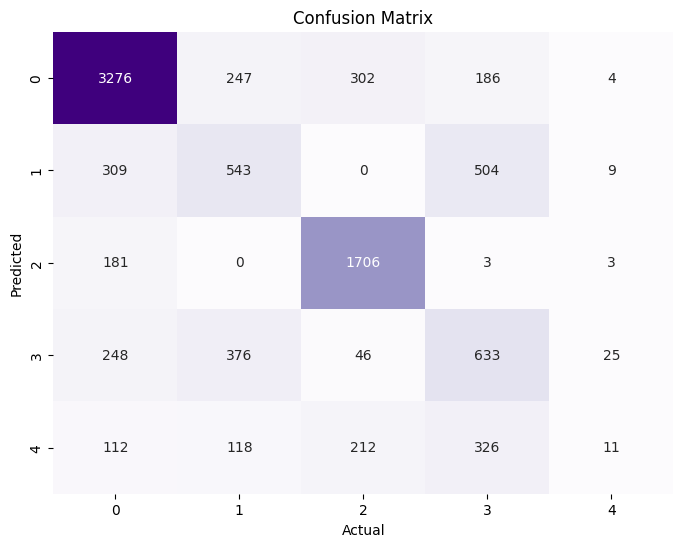

In [ ]:
# plot confusion matrix
plot_confusion_matrix(xgb_class1[4], xgb_class1[3])

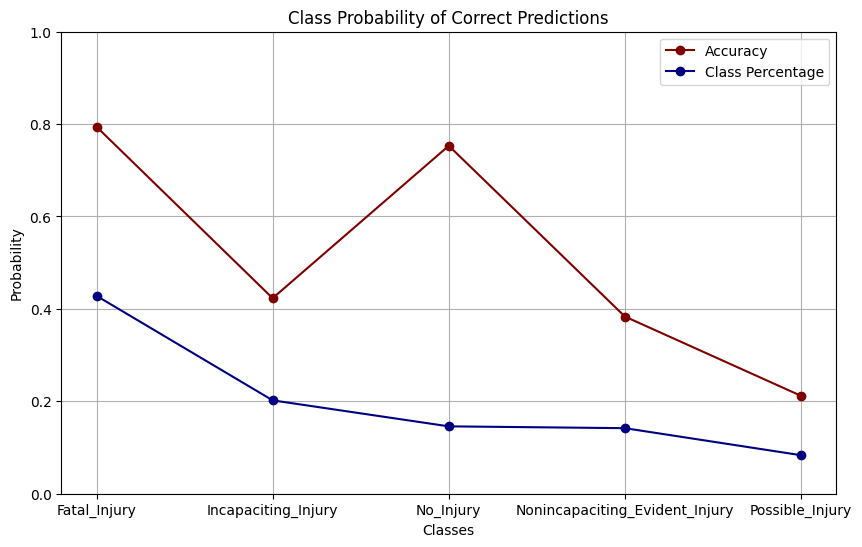

In [ ]:
# probability plot
probability_plot(xgb_class1[4], xgb_class1[3])

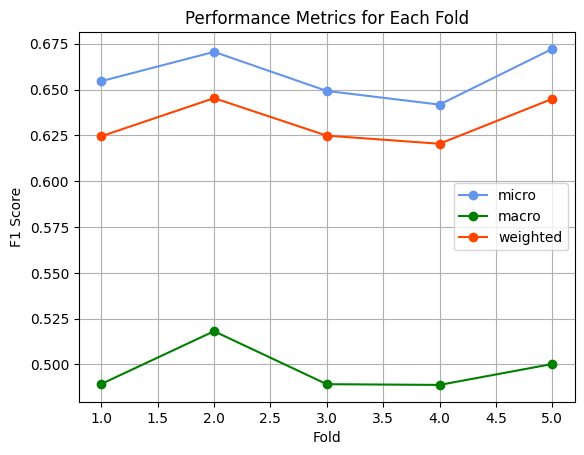

In [ ]:
# plot performance of model
performance_plot(xgb_class1[0], xgb_class1[1], xgb_class1[2])

In [ ]:
# XGBoost classifier (with specific parameters)
classifier = XGBClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.1)

# feature selection with SelectFromModel
selector = SelectFromModel(classifier)

# pipeline with XGBoost and SelectFromModel
pipeline = Pipeline([("FS", selector), ("classifier", classifier)])

# hyperparameters for XGBoost and feature selector
param_grid = dict(
    FS__threshold = ["mean", "median"],
    classifier__n_estimators = [75, 100, 150, 250, 300],
    classifier__max_depth = [3, 4],
    classifier__learning_rate = [0.1, 0.2, 0.3])

xgb_class2 = XGBoostClass_CV(X, y, pipeline, param_grid, k = 5) # 6mins

Internal CV Weighted F1 of estimator: 0.6354514560010818
Number of selected features 24
Selected features ['CASE_STATE_RATE', 'AGE', 'ALCOHOL_TEST_RESULT', 'DRUG_TEST_RESULTS_(1_of_3)', 'PERSON_TYPE_Driver', 'PERSON_TYPE_Passenger_of_a_Motor_Vehicle_in_Transport', 'PERSON_TYPE_Pedestrian', 'SEATING_POSITION_Front_Seat_-_Right_Side', 'SEATING_POSITION_Non-Motorist', 'SEATING_POSITION_Other_Passenger_in_enclosed_passenger_or_cargo_area', 'RESTRAINT_SYSTEM-USE_Lap_and_Shoulder_Belt', 'RESTRAINT_SYSTEM-USE_Motorcycle_Helmet', 'RESTRAINT_SYSTEM-USE_None_Used/Not_Applicable', 'AIR_BAG_AVAILABILITY/DEPLOYMENT_Deployed_Air_Bag_from_Front', 'EJECTION_Not_Ejected', 'EJECTION_Totally_Ejected', 'EXTRICATION_Extricated', 'EXTRICATION_Not_Extricated', 'ALCOHOL_TEST_TYPE_Breath_BAC', 'ALCOHOL_TEST_TYPE_Not_Tested_for_Alcohol', 'ALCOHOL_TEST_TYPE_Whole_Blood', 'DRUG_TEST_TYPE_(1_of_3)_Blood_Test', 'TAKEN_TO_HOSPITAL_No', 'RELATED_FACTOR_(1)-PERSON_LEVEL_Not_Applicable_-_Driver/None_-_All_Other_Persons

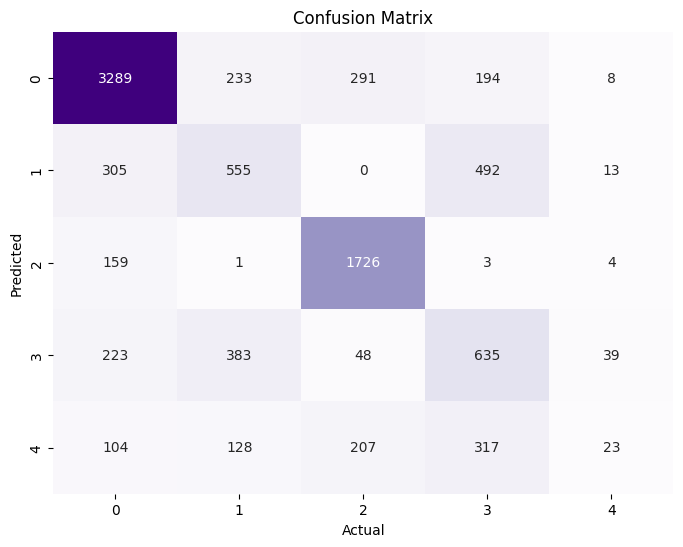

In [ ]:
# plot confusion matrix
plot_confusion_matrix(xgb_class2[4], xgb_class2[3])

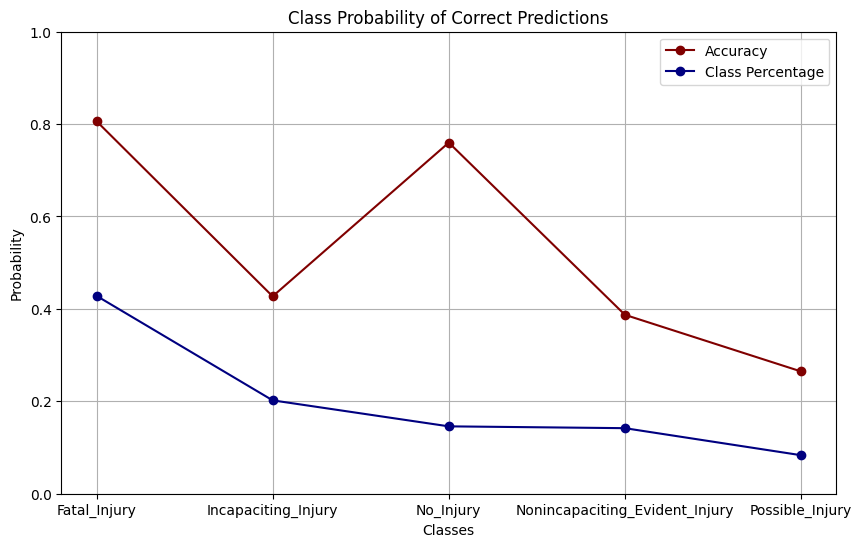

In [ ]:
# probability plot
probability_plot(xgb_class2[4], xgb_class2[3])

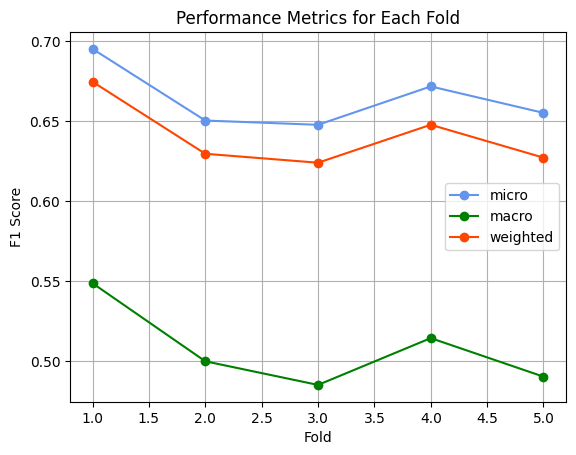

In [ ]:
# plot performance of model
performance_plot(xgb_class2[0], xgb_class2[1], xgb_class2[2])

This first model of depth 3, density of 250 and learning rate of 0.2 has been the best model seen so far. Not only has the XGBoost managed to produce a model of accuracy 67.5%, it has been the quickest too. Without a doubt this will be used to model the whole dataset but first we will just look at a quick comparison in the conclusion section.

# Modelling - Deep Learning Methods

## Introduction

First we will load in the relevant packages for deep learning models, specifically recurrent neural networks (RNNs). There is also another option to pre-process the data, if not already done so.

In [ ]:
# deep learning (NN)
!pip install -q keras==2.12.0
from keras.models import Sequential
from keras.layers import RNN, LSTM, GRU, Bidirectional, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# preprocess data here to skip previous steps
df = preprocess_df(raw_df)
#data.info()

Generally, most RNNs require an input in the form of a 3D tensor, at least the algorithms covered in this project. Since this project focuses on predicting injury severity, it seems appropriate to use a timestep of the users liking. We will then build a model designed to predict a injury level given a number of samples equal to the timestep.

In [ ]:
# encode target feature
le = LabelEncoder()
#le.inverse_transform(predicted_values)

In [ ]:
# converts data to tensor format
def NeuralNetwork_format(df, timesteps = 10):

    # convert to matrix
    matrix = df.to_numpy()

    # scale data (not target)
    scaler = StandardScaler()
    matrix[:, :-1] = scaler.fit_transform(matrix[:, :-1])
    matrix[:, -1] = le.fit_transform(matrix[:, -1])

    # convert to tensor
    X = []
    y = []
    for i in range(len(matrix) - timesteps):
        row = [r for r in matrix[i:i + timesteps]]
        X.append(row)
        target = matrix[i + timesteps][-1]
        y.append(target)
    X = np.array(X)[:, :, :-1]
    X = [np.array(row).astype("float64") for row in X]

    return np.array(X), np.array(y), pd.DataFrame(matrix)

Since the nature of these RNN models is to treat the data as a sort of time series when it takes in the data, we should shuffle randomly first to ensure there is no bias to specific accidents. They are currently in alphabetical state format which evidently introduces some sort of order, whether it seems meaningless or not.

In [ ]:
# sample data
sample = df # full data
sample = sample.sample(frac = 1.0).reset_index(drop = True)
cols = sample.columns

## LSTM

First we will look at this Long Short-Term Memory (LSTM) Neural Network. This is more complex version of the RNN, designed to capture and recall patterns within the data effectively and over a long time.  It introduces memory cells and gates of particular activation functions to control information on the data. This also allows it to solve the vanishing gradient problem that standard vanilla RNNs struggle with. This will be useful since there is a lot of data to consider. We will explore these different activation functions, hidden and output, along with chaning the neurons within the model.

In [ ]:
def lstmClass_CV(sample, pipeline, param_grid, k = 5, features = 5, timesteps = 4):

    # initialise lists
    micros = [] # test error
    macros = []
    weighteds = []
    preds = []  # predicitons
    actuals = [] # unseen data

    # transform dataset into X and y tensors (for RNN)
    X, y, matrix = NeuralNetwork_format(sample, timesteps = timesteps)

    # CV
    kf = StratifiedKFold(n_splits = k, shuffle = True)
    for train_index, test_index in kf.split(X, y):

        # train and test data for CV
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # finding optimal models, hyperparameter tuning
        grid_search = RandomizedSearchCV(pipeline, param_distributions = param_grid, cv = kf, scoring = "f1_weighted", verbose = 0, n_jobs = 1, n_iter = 2) # maximse -mse
        grid_search.fit(X_train, y_train) # search
        print("Internal CV Weighted F1 of estimator: {}".format(grid_search.best_score_))

        # best estimator
        estimator = grid_search.best_estimator_ # best estimator

        # number of neurons/units and activation function used
        params = estimator.named_steps["classifier"].get_params()
        print("Chosen hyperparameters:")
        print(params)

        # predicting the test data with the omptimised models
        predictions = estimator.predict(X_test) # predict
        micro = metrics.f1_score(y_test, predictions, average = "micro")
        macro = metrics.f1_score(y_test, predictions, average = "macro")
        weighted = metrics.f1_score(y_test, predictions, average = "weighted")
        micros.append(micro) # add error to errors list
        macros.append(macro)
        weighteds.append(weighted)
        preds.extend(predictions) # predicted
        actuals.extend(y_test) # unseen test data
        print("Weighted F1 performance on this test set: {}".format(weighted))

        print("--------------------------------------------------")

    return micros, macros, weighteds, preds, actuals

In [ ]:
def lstmClass_model(neurons = 256, regularisation = "tanh", importance = "softmax", optimiser = "adam", features = 46, timesteps = 10):

    # build LSTM model (3 layer)
    lstm = Sequential() # method to build NN layer by layer
    lstm.add(LSTM(neurons, input_shape = (timesteps, features), return_sequences = True, activation = regularisation))
    lstm.add(Dropout(0.1)) # regularisation technique
    #lstm.add(LSTM(neurons, input_shape = (timesteps, features), return_sequences = True, activation = regularisation))
    #lstm.add(Dropout(0.1)) # introduces noise to model, prevents overfitting, drops units at this rate
    lstm.add(LSTM(neurons, return_sequences = False, activation = regularisation)) # 2nd layer, False returns output only
    lstm.add(Dropout(0.1))
    lstm.add(Dense(1, activation = importance))
    lstm.compile(optimizer = optimiser, loss = "categorical_crossentropy")
    #lstm.summary() # model structure summary

    return lstm

In [ ]:
# LSTM classifier (with specific parameters)
classifier = KerasClassifier(build_fn = lstmClass_model, verbose = 0)

# pipeline with LSTM
pipeline = Pipeline([("classifier", classifier)])

# hyperparameters for LSTM
param_grid = dict(
    classifier__neurons = [64, 128, 256],
    classifier__regularisation = ["tanh", "relu", "sigmoid"], # (hidden) relu, sigmoid, tanh
    classifier__importance = ["softmax"]) # (output) linear, sigmoid(binary), softmax(multiclass)

lstm_model1 = lstmClass_CV(sample, pipeline, param_grid, k = 5, features = sample.shape[1] - 1, timesteps = 10)

## GRU

Now, we will look at a Gated Recurrent Unit (GRU). Similarly to LSTM, this is an advanced RNN developed to solve the vanishing gradient problem seen in RNNs through the use of its reset and updating gates taht control information within the algorithm. Due to its reduced gates, it is computationally quicker than LSTM and useful when forecasting time series. We will perform a similar algorithm to the LSTM, continuing with a timestep of 4 and layers of 2. It is important to note that just because LSTM performs better with 2 layers, it does not necesarrily mean it will be better than GRU with 3. We will not have time to explore every model but we will tweek the best ones.

In [ ]:
def gruClass_CV(sample, pipeline, param_grid, k = 5, features = 5, timesteps = 4):

    # initialise lists
    micros = [] # test error
    macros = []
    weighteds = []
    preds = []  # predicitons
    actuals = [] # unseen data

    # transform dataset into X and y tensors (for RNN)
    X, y, matrix = NeuralNetwork_format(sample, timesteps = timesteps)

    # CV
    kf = StratifiedKFold(n_splits = k, shuffle = True)
    for train_index, test_index in kf.split(X, y):

        # train and test data for CV
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # finding optimal models, hyperparameter tuning
        grid_search = RandomizedSearchCV(pipeline, param_distributions = param_grid, cv = kf, scoring = "f1_weighted", verbose = 0, n_jobs = 1, n_iter = 2) # maximse -mse
        grid_search.fit(X_train, y_train) # search
        print("Internal CV Weighted F1 of estimator: {}".format(grid_search.best_score_))

        # best estimator
        estimator = grid_search.best_estimator_ # best estimator

        # number of neurons/units and activation function used
        params = estimator.named_steps["classifier"].get_params()
        print("Chosen hyperparameters:")
        print(params)

        # predicting the test data with the omptimised models
        predictions = estimator.predict(X_test) # predict
        micro = metrics.f1_score(y_test, predictions, average = "micro")
        macro = metrics.f1_score(y_test, predictions, average = "macro")
        weighted = metrics.f1_score(y_test, predictions, average = "weighted")
        micros.append(micro) # add error to errors list
        macros.append(macro)
        weighteds.append(weighted)
        preds.extend(predictions) # predicted
        actuals.extend(y_test) # unseen test data
        print("Weighted F1 performance on this test set: {}".format(weighted))

        print("--------------------------------------------------")

    return micros, macros, weighteds, preds, actuals

In [ ]:
def gruClass_model(neurons = 256, regularisation = "tanh", importance = "softmax", optimiser = "adam", features = 46, timesteps = 10):

    # build LSTM model (3 layer)
    gru = Sequential() # method to build NN layer by layer
    gru.add(GRU(neurons, input_shape = (timesteps, features), return_sequences = True, activation = regularisation))
    gru.add(Dropout(0.1)) # regularisation technique
    gru.add(GRU(neurons, return_sequences = False, activation = regularisation)) # 2nd layer, False returns output only
    gru.add(Dropout(0.1))
    gru.add(Dense(1, activation = importance))
    gru.compile(optimizer = optimiser, loss = "categorical_crossentropy")
    #gru.summary() # model structure summary

    return gru

In [ ]:
# GRU classifier (with specific parameters)
classifier = KerasClassifier(build_fn = lstmClass_model, verbose = 0)

# pipeline with GRU
pipeline = Pipeline([("classifier", classifier)])

# hyperparameters for GRU
param_grid = dict(
    classifier__neurons = [64, 128, 256],
    classifier__regularisation = ["tanh", "relu", "sigmoid"], # (hidden) relu, sigmoid, tanh
    classifier__importance = ["softmax"]) # (output) linear, sigmoid(binary), softmax(multiclass)

gru_model1 = gruClass_CV(sample, pipeline, param_grid, k = 5, features = sample.shape[1] - 1, timesteps = 10)

## LSTM/GRU Hybrid

Taking a quick look at a hybrid of the two models where it the data will enter a LSTM layer first and then a GRU layer in the second one. This combination aims to leverage the strengths of both Neural Networks, hoefully enhancing the models ability to capture the underlying patterns in the data.

In [ ]:
def lstmgruClass_CV(sample, pipeline, param_grid, k = 5, features = 5, timesteps = 4):

    # initialise lists
    micros = [] # test error
    macros = []
    weighteds = []
    preds = []  # predicitons
    actuals = [] # unseen data

    # transform dataset into X and y tensors (for RNN)
    X, y, matrix = NeuralNetwork_format(sample, timesteps = timesteps)

    # CV
    kf = StratifiedKFold(n_splits = k, shuffle = True)
    for train_index, test_index in kf.split(X, y):

        # train and test data for CV
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # finding optimal models, hyperparameter tuning
        grid_search = RandomizedSearchCV(pipeline, param_distributions = param_grid, cv = kf, scoring = "f1_weighted", verbose = 0, n_jobs = 1, n_iter = 2) # maximse -mse
        grid_search.fit(X_train, y_train) # search
        print("Internal CV Weighted F1 of estimator: {}".format(grid_search.best_score_))

        # best estimator
        estimator = grid_search.best_estimator_ # best estimator

        # number of neurons/units and activation function used
        params = estimator.named_steps["classifier"].get_params()
        print("Chosen hyperparameters:")
        print(params)

        # predicting the test data with the omptimised models
        predictions = estimator.predict(X_test) # predict
        micro = metrics.f1_score(y_test, predictions, average = "micro")
        macro = metrics.f1_score(y_test, predictions, average = "macro")
        weighted = metrics.f1_score(y_test, predictions, average = "weighted")
        micros.append(micro) # add error to errors list
        macros.append(macro)
        weighteds.append(weighted)
        preds.extend(predictions) # predicted
        actuals.extend(y_test) # unseen test data
        print("Weighted F1 performance on this test set: {}".format(weighted))

        print("--------------------------------------------------")

    return micros, macros, weighteds, preds, actuals

In [ ]:
def lstmgruClass_model(neurons = 256, regularisation = "tanh", importance = "softmax", optimiser = "adam", features = 46, timesteps = 10):

    # build lstm/gru model (3 layer)
    lstmgru = Sequential() # method to build NN layer by layer
    lstmgru.add(LSTM(neurons, input_shape = (timesteps, features), return_sequences = True, activation = regularisation))
    lstmgru.add(Dropout(0.1)) # regularisation technique
    lstmgru.add(GRU(neurons, return_sequences = False, activation = regularisation)) # 2nd layer, False returns output only
    lstmgru.add(Dropout(0.1))
    lstmgru.add(Dense(1, activation = importance))
    lstmgru.compile(optimizer = optimiser, loss = "categorical_crossentropy")
    #lstmgru.summary() # model structure summary

    return lstmgru

In [ ]:
# LSTMGRU classifier (with specific parameters)
classifier = KerasClassifier(build_fn = lstmgruClass_model, verbose = 0)

# pipeline with LSTMGRU
pipeline = Pipeline([("classifier", classifier)])

# hyperparameters for LSTMGRU
param_grid = dict(
    classifier__neurons = [64, 128, 256],
    classifier__regularisation = ["tanh", "relu", "sigmoid"], # (hidden) relu, sigmoid, tanh
    classifier__importance = ["softmax"]) # (output) linear, sigmoid(binary), softmax(multiclass)

lstmgru_model1 = lstmgruClass_CV(sample, pipeline, param_grid, k = 5, features = sample.shape[1] - 1, timesteps = 10)

## Bidirectional GRU

This is a Bidirectional GRU processes, it inputs data in both forward and backward directions allowing it to capture information from both past and future contexts. This enhances the model's ability to understand input sequences and is beneficial for tasks like time series forecasting where the future values also have an impact on data.

In [ ]:
def bdClass_CV(sample, pipeline, param_grid, k = 5, features = 5, timesteps = 4):

    # initialise lists
    micros = [] # test error
    macros = []
    weighteds = []
    preds = []  # predicitons
    actuals = [] # unseen data

    # transform dataset into X and y tensors (for RNN)
    X, y, matrix = NeuralNetwork_format(sample, timesteps = timesteps)

    # CV
    kf = StratifiedKFold(n_splits = k, shuffle = True)
    for train_index, test_index in kf.split(X, y):

        # train and test data for CV
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # finding optimal models, hyperparameter tuning
        grid_search = RandomizedSearchCV(pipeline, param_distributions = param_grid, cv = kf, scoring = "f1_weighted", verbose = 0, n_jobs = 1, n_iter = 2) # maximse -mse
        grid_search.fit(X_train, y_train) # search
        print("Internal CV Weighted F1 of estimator: {}".format(grid_search.best_score_))

        # best estimator
        estimator = grid_search.best_estimator_ # best estimator

        # number of neurons/units and activation function used
        params = estimator.named_steps["classifier"].get_params()
        print("Chosen hyperparameters:")
        print(params)

        # predicting the test data with the omptimised models
        predictions = estimator.predict(X_test) # predict
        micro = metrics.f1_score(y_test, predictions, average = "micro")
        macro = metrics.f1_score(y_test, predictions, average = "macro")
        weighted = metrics.f1_score(y_test, predictions, average = "weighted")
        micros.append(micro) # add error to errors list
        macros.append(macro)
        weighteds.append(weighted)
        preds.extend(predictions) # predicted
        actuals.extend(y_test) # unseen test data
        print("Weighted F1 performance on this test set: {}".format(weighted))

        print("--------------------------------------------------")

    return micros, macros, weighteds, preds, actuals

In [ ]:
def bdClass_model(neurons = 256, regularisation = "tanh", importance = "softmax", optimiser = "adam", features = 46, timesteps = 10):

    # build LSTM model (3 layer)
    bd = Sequential() # method to build NN layer by layer
    bd.add(Bidirectional(GRU(neurons, input_shape = (timesteps, features), return_sequences = True, activation = regularisation)))
    bd.add(Dropout(0.1)) # regularisation technique
    bd.add(Bidirectional(GRU(neurons, return_sequences = False, activation = regularisation))) # 2nd layer, False returns output only
    bd.add(Dropout(0.1))
    bd.add(Dense(1, activation = importance))
    bd.compile(optimizer = optimiser, loss = "categorical_crossentropy")
    #bd.summary() # model structure summary

    return bd

In [ ]:
# Bidirectional classifier (with specific parameters)
classifier = KerasClassifier(build_fn = bdClass_model, verbose = 0)

# pipeline with Bidirectional
pipeline = Pipeline([("classifier", classifier)])

# hyperparameters for Bidirectional
param_grid = dict(
    classifier__neurons = [64, 128, 256],
    classifier__regularisation = ["tanh", "relu", "sigmoid"], # (hidden) relu, sigmoid, tanh
    classifier__importance = ["softmax"]) # (output) linear, sigmoid(binary), softmax(multiclass)

bd_model1 = bdClass_CV(sample, pipeline, param_grid, k = 5, features = sample.shape[1] - 1, timesteps = 10)

# Prediction and Conclusion

Since each model was tested differently, some where not computing every possibilty from the grid and some grids were larger than others,it is difficult to make a plot comparing the best. This would have been easier had they all taken a similar amount of time. Instead, the decision will be taken from how well the model performed and how quickly it can train itself. They all made 5 folds so lets ignore that and so XGBoost was completing about 10 iterations every 72 seconds, roughly. This makes it the fastest with only RandomForest being close at about 20 minutes per 27 iterations. This is also taking into account it was trained on approximately 90% of the whole data, as was RandomForest and AdaBoost. Not only was it the quickest but it actually had the most accuracy too, according to a weighted F1 score. It was correct about 67.5% of the time with Gradient Boosting falling just short at 66.3%. It is important to note that Gradient Boosting, and the other relatively unexplored models, could have fit the data better had they have had more time but ultimately it was a balance of time that prevented this. Therefore, it seems that XGBoost will model the data and we will see its predictions on the unseen data.

In [ ]:
# probability plot function
def compare_probability_plot(actual1, actual2, pred1, pred2, pred):

    # plot confusion matrix
    actual1 = le.inverse_transform(actual1)
    actual2 = le.inverse_transform(actual2)
    pred1 = le.inverse_transform(pred1)
    pred2 = le.inverse_transform(pred2)
    cf_matrix1 = confusion_matrix(actual1, pred1)
    cf_matrix2 = confusion_matrix(actual2, pred2)
    class_accuracy1 = np.diag(cf_matrix1) / np.sum(cf_matrix1, axis = 0)
    class_accuracy2 = np.diag(cf_matrix2) / np.sum(cf_matrix2, axis = 0)

    # bar plot
    plt.figure(figsize = (10, 6))
    plt.plot(le.classes_, class_accuracy1, marker = "o", color = "orange")
    plt.plot(le.classes_, class_accuracy2, marker = "o", color = "limegreen")
    plt.title("Class Probability of Correct Predictions")
    plt.xlabel("Classes")
    plt.ylabel("Probability")
    plt.legend(["Model 1", "Model 2"])
    plt.ylim(0, 1)
    plt.grid(True)

In [ ]:
# set sample for modelling

# sample data
sample = df.sample(n = 90000, random_state = 1311) # approx 90% of data
unseen = ~df.index.isin(sample.index)
#sample = df[0::10] # every 10th value

# convert data to matrix form
X = sample.iloc[:, :-1].values
y = sample.iloc[:, -1].values
cols = sample.columns

# encode target feature
le = LabelEncoder()
y = le.fit_transform(y)
#le.inverse_transform(predicted_values)

In [ ]:
# XGBoost classification with FS, CV and fine-tuning
def XGBoostClass_CV(X, y, pipeline, param_grid, k = 10):

    # initialise lists
    micros = []
    macros = []
    weighteds = []
    preds = []
    actuals = []

    # k-fold CV
    kf = StratifiedKFold(n_splits = k, shuffle = True)
    for train_index, test_index in kf.split(X, y):

        # train and test data for CV
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # finding optimal models, hyperparameter tuning
        grid_search = GridSearchCV(pipeline, param_grid = param_grid, cv = kf, scoring = "f1_weighted", verbose = 0, n_jobs = -1)
        grid_search.fit(X_train, y_train)
        print("Internal CV Weighted F1 of estimator: {}".format(grid_search.best_score_))

        # number of features selected
        estimator = grid_search.best_estimator_

        # Access the SelectFromModel transformer and get the support mask
        support = estimator.named_steps['FS'].get_support()
        num_feat = np.sum(support)
        print("Number of selected features {0}".format(num_feat))

        # features selected
        col_index = np.where(support)[0]
        col_names = [cols[col] for col in col_index]
        print("Selected features {0}".format(col_names))

        # depth, number of trees and learning rate
        print("Max depth {0}".format(estimator.named_steps["classifier"].max_depth))
        print("Number of trees {0}".format(estimator.named_steps["classifier"].n_estimators))
        print("Learning rate {0}".format(estimator.named_steps["classifier"].learning_rate))

        # predicting the test data with the omptimised models
        predictions = estimator.predict(X_test)
        preds.extend(predictions)
        actuals.extend(y_test)
        micro = metrics.f1_score(y_test, predictions, average = "micro") # treats as binary
        macro = metrics.f1_score(y_test, predictions, average = "macro") # unweighted average
        weighted = metrics.f1_score(y_test, predictions, average = "weighted") # considers imbalance
        micros.append(micro)
        macros.append(macro)
        weighteds.append(weighted)
        print("Weighted F1 performance on this test set: {}".format(weighted))

        print("--------------------------------------------------")

    return micros, macros, weighteds, preds, actuals

In [ ]:
# XGBoost classifier (with specific parameters)
classifier = XGBClassifier(max_depth = 3, n_estimators = 250, learning_rate = 0.2)

# feature selection with SelectFromModel
selector = SelectFromModel(classifier)

# pipeline with XGBoost and SelectFromModel
pipeline = Pipeline([("FS", selector), ("classifier", classifier)])

# hyperparameters for XGBoost and feature selector
param_grid = dict(
    FS__threshold = ["mean", "median"])

xgb_class_final = XGBoostClass_CV(X, y, pipeline, param_grid, k = 10)

Internal CV Weighted F1 of estimator: 0.6540266742390946
Number of selected features 24
Selected features ['CASE_STATE_RATE', 'AGE', 'ALCOHOL_TEST_RESULT', 'DRUG_TEST_RESULTS_(1_of_3)', 'PERSON_TYPE_Driver', 'PERSON_TYPE_Passenger_of_a_Motor_Vehicle_in_Transport', 'PERSON_TYPE_Pedestrian', 'SEATING_POSITION_Front_Seat_-_Right_Side', 'SEATING_POSITION_Non-Motorist', 'SEATING_POSITION_Other_Passenger_in_enclosed_passenger_or_cargo_area', 'RESTRAINT_SYSTEM-USE_Lap_and_Shoulder_Belt', 'RESTRAINT_SYSTEM-USE_Motorcycle_Helmet', 'RESTRAINT_SYSTEM-USE_None_Used/Not_Applicable', 'AIR_BAG_AVAILABILITY/DEPLOYMENT_Deployed_Air_Bag_from_Front', 'EJECTION_Not_Ejected', 'EJECTION_Totally_Ejected', 'EXTRICATION_Extricated', 'EXTRICATION_Not_Extricated', 'ALCOHOL_TEST_TYPE_Breath_BAC', 'ALCOHOL_TEST_TYPE_Not_Tested_for_Alcohol', 'ALCOHOL_TEST_TYPE_Whole_Blood', 'DRUG_TEST_TYPE_(1_of_3)_Blood_Test', 'TAKEN_TO_HOSPITAL_No', 'RELATED_FACTOR_(1)-PERSON_LEVEL_Not_Applicable_-_Driver/None_-_All_Other_Persons

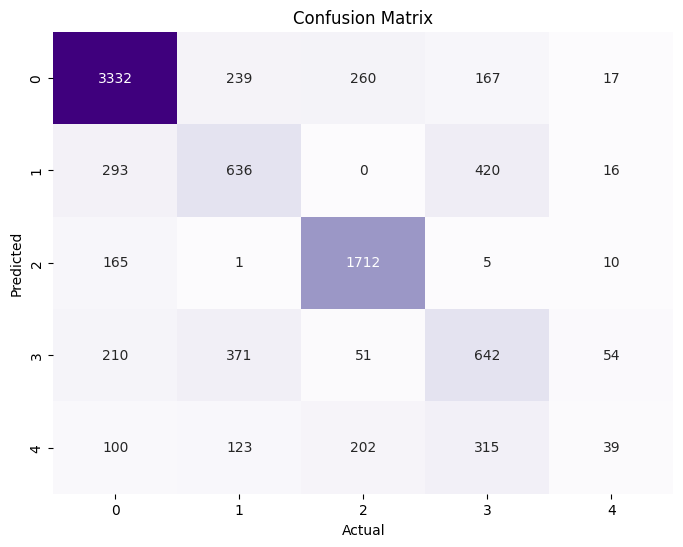

In [ ]:
# plot confusion matrix
plot_confusion_matrix(xgb_class_final[4], xgb_class_final[3])

Looking at the average predictions across the folds, it seems that the diagonal is the majority vote apart from 4: possible injury. This is probably due to the model favouring the larger populated classes (weighted) since this is the smallest. It is also interesting to see that, on average, the model struggles to differentiate between capacitating injury and no evident capacitating injury given by 420. This is fairly close to 642 and it makes sense in real-world terms as there may not be a lot to distinguish them.

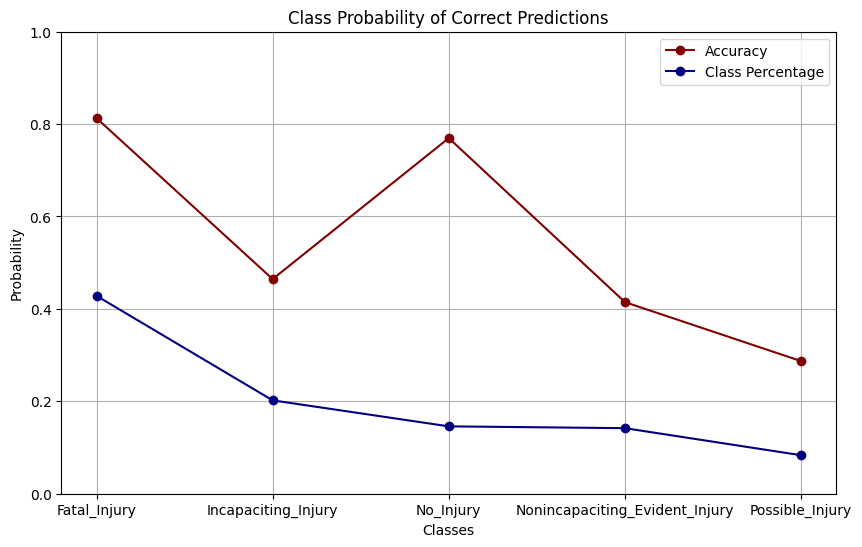

In [ ]:
# probability plot
probability_plot(xgb_class_final[4], xgb_class_final[3])

We are very good at predicting a fatal and no injury situation but we struggle with the second most frequent class. Again, this could be to do with the reason mensioned before. In general, though, we see this general decreasing trend form left to right indicating that the weighted F1 score has done its job.

Going back to the first statement, we wanted to make sure we predicted the highest occuring class the best, fatal injuries, and since we achieve an average just above 80% on almost 50% of the data, we have done a relatively good job.

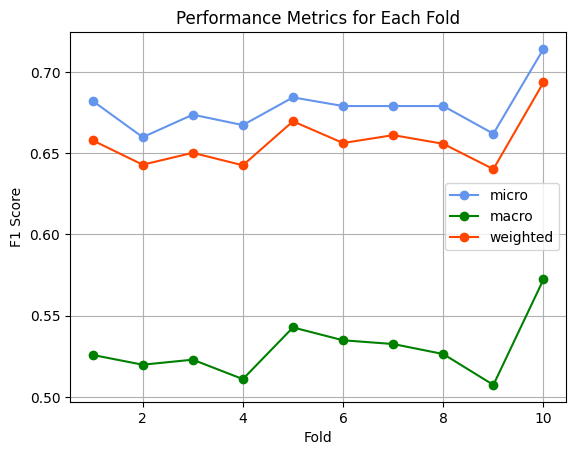

In [ ]:
# plot performance of model
performance_plot(xgb_class_final[0], xgb_class_final[1], xgb_class_final[2])

In [ ]:
np.array(xgb_class_final[2]).mean()

0.6570794364791792

This last fold we produce looks really good, were almost achieving a 70% accuracy. Overall though, since the average is most important, we can see that we achieve an overall weighted F1 score of 65.7% which is pretty good.

# References

Brownlee, J. (21 August 2019). 4 Strategies for Multi-Step Time Series Forecasting. [Online] Available at: https://machinelearningmastery.com/multi-step-time-series-forecasting/ (Accessed 12 January 2024).

Solomon, B. (07 July 2015). Does GridSearchCV not support multi-class?. [Online] Available at: https://stackoverflow.com/questions/31265110/does-gridsearchcv-not-support-multi-classmulti-step-time-series-forecasting/ (Accessed 12 January 2024).

Dozat, T. (2015). Nadam. [Online] Available at:https://keras.io/api/optimizers/Nadam/ (Accessed 12 January 2024).

jax. (27 March 2015). How to calculate correlation between all columns and remove highly correlated ones using pandas?. [Online] https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on (Accessed 12 January 2024).

Kaplan, B. (2023). Fatal Car Accidents by State. [Online] Available at: https://wisevoter.com/state-rankings/fatal-car-accidents-by-state/ (Accessed 12 January 2024).

Kaplan, B. (2023). Fatal Car Accidents by State. [Online] Available at: https://wisevoter.com/state-rankings/fatal-car-accidents-by-state/ (Accessed 12 January 2024).

Attri, P. (22 November 2023). Timeseries forecasting for weather prediction. [Online] Available at: https://colab.research.google.com/github/keras-team/keras-io/blob/master/examples/timeseries/ipynb/timeseries_weather_forecasting.ipynb#scrollTo=Li9Xe4tFXWvO (Accessed 12 January 2024).

aghd. (12 October 2017). How to have scatter points become larger for higher density using matplotlib?. [Online] Available at: https://stackoverflow.com/questions/46700733/how-to-have-scatter-points-become-larger-for-higher-density-using-matplotlib (Accessed 12 January 2024).